In [324]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.power import TTestIndPower, TTestPower
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold,StratifiedKFold
from sklearn import neighbors, datasets, preprocessing, metrics
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
import requests
import mysql.connector
# import config
from bs4 import BeautifulSoup 
import json
import time


# Data import/Manipulation from CSV file

In [365]:
# from kaggle this is a dataset of MyAnimeList.net of popular anime

# exporting csv file to a DataFrame only using columns listed
data = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv", usecols=['Name','Platform','Year_of_Release','Genre','Publisher','NA_Sales', 'EU_Sales', 'JP_Sales','Other_Sales','Global_Sales','Critic_Score', 'User_Score','User_Count','Developer','Rating'])
# 
# dropping all null values
data.dropna(inplace = True) 
data.info()
# data_le_nums

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 180 to 16141
Data columns (total 15 columns):
Name               6644 non-null object
Platform           6644 non-null object
Year_of_Release    6644 non-null float64
Genre              6644 non-null object
Publisher          6644 non-null object
NA_Sales           6644 non-null float64
EU_Sales           6644 non-null float64
JP_Sales           6644 non-null float64
Other_Sales        6644 non-null float64
Global_Sales       6644 non-null float64
Critic_Score       6644 non-null float64
User_Score         6644 non-null object
User_Count         6644 non-null float64
Developer          6644 non-null object
Rating             6644 non-null object
dtypes: float64(8), object(7)
memory usage: 830.5+ KB


# Api Calls for the Console info

In [676]:
headers = {
    'x-rapidapi-host': "rawg-video-games-database.p.rapidapi.com",
    'x-rapidapi-key': "912aa21767msh00835e94c88a76dp127f61jsnacbcfb6be340"
    }
console_data = []
for i in range(1,100):    ### Consoles in api call some are empty and i know there isn't more then 100 consoles
    url = f"https://rawg-video-games-database.p.rapidapi.com/platforms/{i}"
    response = requests.request("GET", url, headers=headers)
    if response == '{"detail":"Not found."}':
        break
    else:
        console_data.append(response.json())

console_data

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [704]:
#making copy of api info
console_data_copy = console_data.copy()
console_data_copy

[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [690]:
# removing empty "{"detail":"Not found."}" from api call list of dictionaries
console_data_copy = [x for x in console_data_copy if keys is not 'detail' in x]

console_data_copy

NameError: name 'keys' is not defined

In [678]:
# for i in range(0,len(console_data_copy)):
#     if console_data_copy[i] == {'detail': 'Not found.'}:
#         console_data_copy.remove(console_data_copy[i])
#         continue
#     else:
#         break
# console_data_copy



[{'id': 1,
  'name': 'Xbox One',
  'slug': 'xbox-one',
  'games_count': 2942,
  'image_background': 'https://media.rawg.io/media/games/9fa/9fa63622543e5d4f6d99aa9d73b043de.jpg',
  'description': '<p>Xbox One is a home video game console released by Microsoft in 2013. Unlike its main competitor — PlayStation 4, the accent in the development was made in multitasking and using a console as a home media player to watch TV, listen to music and play the games. There is three hardware option available to gamers: original console, One S version (with a smaller body, no external power supply, and native HDR/4k support) and One X (pro-gamer-oriented system with updated hardware and 4k rendering in real time). While PS4 is known for exclusive-orientation, Xbox One&#39;s games are mostly multi-platform titles. This supports Microsoft&#39;s initial idea to prevent selling used games between the players. However, given the competition from the Sony side, the corporation quickly gave up. Among the no

In [672]:
# for i in range(0,len(console_data_copy)):
#     data_consoles = pd.DataFrame.from_dict(console_data_copy[i])

# data_consoles

ValueError: If using all scalar values, you must pass an index

In [742]:
data_consoles = pd.DataFrame.from_dict(console_data_copy)
data_consoles.drop(columns = ['year_end' ,'year_start', 'detail', 'image'])


description  games_count    id  \
0   <p>Xbox One is a home video game console relea...       2942.0   1.0   
1                                                 NaN          NaN   NaN   
2   <p>iOS is an operating system initially develo...      64520.0   3.0   
3   <p>PC games, or personal computer games, start...     194331.0   4.0   
4   <p>MacOS (previously OS X) is an operating sys...      45674.0   5.0   
5   <p>Linux is a free and open-source software op...      30416.0   6.0   
6   <p>Nintendo Switch is a hybrid video game cons...       3025.0   7.0   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...       1706.0   8.0   
8   <p>Nintendo DS is Nintendo’s fourth major port...       2239.0   9.0   
9   <p>Nintendo Wii U is the sixth major home vide...       1271.0  10.0   
10  <p>Wii is Nintendo’s fifth major home video ga...       2291.0  11.0   
11  <p>NEOGEO is a cartridge-based arcade system b...         37.0  12.0   
12                                                            16.0  13.0   
13  <p>Xbox 360 is a home video game console relea...       2477.0  14.0   
14  <p>PlayStation 2 is the sixth generation video...       1708.0  15.0   
15  <p>PS3 is a home gaming console released by So...       3545.0  16.0   
16  <p>PSP, or PlayStation Portable, is the first ...       1524.0  17.0   
17  <p>PlayStation 4 is a home video game console ...       4313.0  18.0   
18  <p>PS Vita is a handheld video game console re...       1872.0  19.0   
19                                                NaN          NaN   NaN   
20  <p>Android is a mobile operating system based ...      26868.0  21.0   
21  <p>Atari Flashback is a series of dedicated vi...         29.0  22.0   
22  <p>Atari 2600 (initially released an Atari Vid...        275.0  23.0   
23  <p>Game Boy Advance is Nintendo’s third major ...        875.0  24.0   
24  <p>Atari 8-bit family is a series of home comp...        297.0  25.0   
25  <p>Game Boy is the first major portable video ...        564.0  26.0   
26  <p>PlayStation is a home video game console re...       1455.0  27.0   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         53.0  28.0   
28                                                NaN          NaN   NaN   
29                                                NaN          NaN   NaN   
..                                                ...          ...   ...   
69                                                NaN          NaN   NaN   
70                                                NaN          NaN   NaN   
71                                                NaN          NaN   NaN   
72                                                NaN          NaN   NaN   
73  <p>SEGA Master System (also known as Mark III ...        194.0  74.0   
74                                                NaN          NaN   NaN   
75                                                NaN          NaN   NaN   
76  <p>Game Gear is the first portable video game ...        149.0  77.0   
77                                                NaN          NaN   NaN   
78  <p>Super Nintendo Entertainment System or SNES...        761.0  79.0   
79  <p>Xbox is a home video game console released ...        617.0  80.0   
80                                                NaN          NaN   NaN   
81                                                NaN          NaN   NaN   
82  <p>Nintendo 64 is the third major video game h...        347.0  83.0   
83                                                NaN          NaN   NaN   
84                                                NaN          NaN   NaN   
85                                                NaN          NaN   NaN   
86                                                NaN          NaN   NaN   
87                                                NaN          NaN   NaN   
88                                                NaN          NaN   NaN   
89                                                NaN          NaN   NaN   
90            

In [732]:
data_consoles.dropna(how='all')

Empty DataFrame
Columns: [description, detail, games_count, id, image, image_background, name, slug, year_end, year_start]
Index: []

In [748]:
data_consoles2 = data_consoles
data_consoles2.usecols=['id' ,'year_start', 'detail', 'image']

data_consoles2 = data_consoles2.dropna(how='all')


In [749]:
data_consoles2

description      detail  \
0   <p>Xbox One is a home video game console relea...         NaN   
1                                                 NaN  Not found.   
2   <p>iOS is an operating system initially develo...         NaN   
3   <p>PC games, or personal computer games, start...         NaN   
4   <p>MacOS (previously OS X) is an operating sys...         NaN   
5   <p>Linux is a free and open-source software op...         NaN   
6   <p>Nintendo Switch is a hybrid video game cons...         NaN   
7   <p>Nintendo 3DS is Nintendo’s fifth major port...         NaN   
8   <p>Nintendo DS is Nintendo’s fourth major port...         NaN   
9   <p>Nintendo Wii U is the sixth major home vide...         NaN   
10  <p>Wii is Nintendo’s fifth major home video ga...         NaN   
11  <p>NEOGEO is a cartridge-based arcade system b...         NaN   
12                                                            NaN   
13  <p>Xbox 360 is a home video game console relea...         NaN   
14  <p>PlayStation 2 is the sixth generation video...         NaN   
15  <p>PS3 is a home gaming console released by So...         NaN   
16  <p>PSP, or PlayStation Portable, is the first ...         NaN   
17  <p>PlayStation 4 is a home video game console ...         NaN   
18  <p>PS Vita is a handheld video game console re...         NaN   
19                                                NaN  Not found.   
20  <p>Android is a mobile operating system based ...         NaN   
21  <p>Atari Flashback is a series of dedicated vi...         NaN   
22  <p>Atari 2600 (initially released an Atari Vid...         NaN   
23  <p>Game Boy Advance is Nintendo’s third major ...         NaN   
24  <p>Atari 8-bit family is a series of home comp...         NaN   
25  <p>Game Boy is the first major portable video ...         NaN   
26  <p>PlayStation is a home video game console re...         NaN   
27  <p>Atari 7800 (also known as Atari 7800 ProSys...         NaN   
28                                                NaN  Not found.   
29                                                NaN  Not found.   
..                                                ...         ...   
69                                                NaN  Not found.   
70                                                NaN  Not found.   
71                                                NaN  Not found.   
72                                                NaN  Not found.   
73  <p>SEGA Master System (also known as Mark III ...         NaN   
74                                                NaN  Not found.   
75                                                NaN  Not found.   
76  <p>Game Gear is the first portable video game ...         NaN   
77                                                NaN  Not found.   
78  <p>Super Nintendo Entertainment System or SNES...         NaN   
79  <p>Xbox is a home video game console released ...         NaN   
80                                                NaN  Not found.   
81                                                NaN  Not found.   
82  <p>Nintendo 64 is the third major video game h...         NaN   
83                                                NaN  Not found.   
84                                                NaN  Not found.   
85                                                NaN  Not found.   
86                                                NaN  Not found.   
87                                                NaN  Not found.   
88                                                NaN  Not found.   
89                                                NaN  Not found.   
90                                                NaN  Not found.   
91                                                NaN  Not found.   
92                                                NaN  Not found.   
93                                                NaN  Not found.   
94                                                NaN  Not found.   
95                                      

# Web scrapping console sell 

In [245]:
# Scrapping console sales data
URL = 'http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/'
r = requests.get(URL)


# Combining both urls into one 'soup'
soup = BeautifulSoup(r.content , 'html.parser')

#printing in sytlized text to read easier
print(soup.prettify()) 


<!DOCTYPE html>
<html lang="en">
 <head>
  <!-- VGCHARTZ MAIN HEADER TAGS -->
  <!-- Venatus Market Ad-Manager (vgchartz.com) -->
  <script>
   (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
  </script>
  <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
  <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
  <script src="http://www.google-analytics.com/urchin.js" type="text/javascript">
  </script>
  <script type="text/javascript">
   _uac

In [385]:
list(soup.children)

['html', '\n', <html lang="en">
 <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uac

In [386]:
[type(item) for item in list(soup.children)]


[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

In [388]:
html = list(soup.children)[2]
html

<html lang="en">
<head>
<!-- VGCHARTZ MAIN HEADER TAGS -->
<!-- Venatus Market Ad-Manager (vgchartz.com) -->
<script>
    (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
    </script>
<!-- / Venatus Market Ad-Manager (vgchartz.com) -->
<meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
<script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
<script type="text/javascript">
        _uacct = "UA-2243248-1";
     

In [390]:
list(html.children)


['\n', <head>
 <!-- VGCHARTZ MAIN HEADER TAGS -->
 <!-- Venatus Market Ad-Manager (vgchartz.com) -->
 <script>
     (function(){document.write('<div id="vmv3-ad-manager" style="display:none"></div>');document.getElementById("vmv3-ad-manager").innerHTML='<iframe id="vmv3-frm" src="javascript:\'<html><body></body></html>\'" width="0" height="0" data-mode="scan" data-site-id="5b11330346e0fb00017cd841"></iframe>';var a=document.getElementById("vmv3-frm");a=a.contentWindow?a.contentWindow:a.contentDocument;a.document.open();a.document.write('<script src="https://hb.vntsm.com/v3/live/ad-manager.min.js" type="text/javascript" async>'+'</scr'+'ipt>');a.document.close()})();
     </script>
 <!-- / Venatus Market Ad-Manager (vgchartz.com) -->
 <meta content="4J-ohFOExhky4T8zKx5Nz04hdjbaxo52B6qVrLlM8o0" name="google-site-verification"/>
 <script src="http://www.google-analytics.com/urchin.js" type="text/javascript"></script>
 <script type="text/javascript">
         _uacct = "UA-2243248-1";
     

In [389]:
# 
console_sales_table = soup.find_all(class_='chart')
console_sales_table


[<table cellpadding="0" cellspacing="0" class="chart" id="myTable" width="100%">
 <thead>
 <tr>
 <th>Pos</th>
 <th style="text-align:left;">Platform</th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/NA/">North America</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/EU/">Europe</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/JP/">Japan</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/ROW/">Rest of World</a></center></th>
 <th><center><a href="http://www.vgchartz.com/analysis/platform_totals/Hardware/Global/" id="selected">Global</a></center></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td>1</td>
 <td><a href="http://www.vgchartz.com/gamedb/games.php?console=PS2">PlayStation 2 (PS2)</a></td>
 <td><center>53.65</center></td>
 <td><center>55.28</center></td>
 <td><center>23.18</center></td>
 <td><center>25.57</cent

In [400]:
table_header=soup.find_all('th').get_text()

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [399]:
table_data=soup.find_all('td')
table_data

AttributeError: ResultSet object has no attribute 'get_text'. You're probably treating a list of items like a single item. Did you call find_all() when you meant to call find()?

In [14]:
data

Name Platform  Year_of_Release  \
0                                        Wii Sports      Wii           2006.0   
2                                    Mario Kart Wii      Wii           2008.0   
3                                 Wii Sports Resort      Wii           2009.0   
6                             New Super Mario Bros.       DS           2006.0   
7                                          Wii Play      Wii           2006.0   
8                         New Super Mario Bros. Wii      Wii           2009.0   
11                                    Mario Kart DS       DS           2005.0   
13                                          Wii Fit      Wii           2007.0   
14                               Kinect Adventures!     X360           2010.0   
15                                     Wii Fit Plus      Wii           2009.0   
16                               Grand Theft Auto V      PS3           2013.0   
17                    Grand Theft Auto: San Andreas      PS2           2004.0   
19     Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   
23                               Grand Theft Auto V     X360           2013.0   
24                      Grand Theft Auto: Vice City      PS2           2002.0   
26      Brain Age 2: More Training in Minutes a Day       DS           2005.0   
28                           Gran Turismo 3: A-Spec      PS2           2001.0   
29                   Call of Duty: Modern Warfare 3     X360           2011.0   
32                          Call of Duty: Black Ops     X360           2010.0   
34                       Call of Duty: Black Ops II      PS3           2012.0   
35                       Call of Duty: Black Ops II     X360           2012.0   
36                   Call of Duty: Modern Warfare 2     X360           2009.0   
37                   Call of Duty: Modern Warfare 3      PS3           2011.0   
38                             Grand Theft Auto III      PS2           2001.0   
39                          Super Smash Bros. Brawl      Wii           2008.0   
40                                     Mario Kart 7      3DS           2011.0   
41                          Call of Duty: Black Ops      PS3           2010.0   
42                               Grand Theft Auto V      PS4           2014.0   
43                      Animal Crossing: Wild World       DS           2005.0   
44                                           Halo 3     X360           2007.0   
...                                             ...      ...              ...   
16513                                        Ride 2       PC           2016.0   
16514                      Art Academy: Home Studio     WiiU           2015.0   
16527                               Icewind Dale II       PC           2002.0   
16530                                    Dungeons 2      PS4           2016.0   
16532                     Pro Evolution Soccer 2010       PC           2009.0   
16533           Hoshigami: Ruining Blue Earth Remix       DS           2007.0   
16534                       Carmageddon: Max Damage      PS4           2016.0   
16536                             Alone in the Dark       PC           2008.0   
16541                        Clive Barker's Jericho       PC           2007.0   
16549                   Madagascar: Escape 2 Africa       PC           2008.0   
16550                   Wade Hixton's Counter Punch      GBA           2004.0   
16553                               Sega Rally Revo       PC           2007.0   
16569                  Egg Mania: Eggstreme Madness       GC           2002.0   
16573                  The Eye of Judgment: Legends      PSP           2010.0   
16576               King's Bounty: Armored Princess       PC           2009.0   
16588               Transformers: Fall of Cybertron       PC           2012.0   
16595                             Micro Machines V4      PS2           2006.0   
16601                   Saints Row: Gat out of Hell     XOne           2015.0 

### Creating Dummies for non-numerical data (for columns : Type, Source, Rating)

In [370]:
# copy dataframe to new DF, and converting FLOAT's to INT's
data_le = data.copy()
# makes Year_of_Release into INT it was a FLOAT
data_le['Year_of_Release']=data_le['Year_of_Release'].astype(int)
data_le['Critic_Score']=data_le['Critic_Score'].astype(int)
data_le['User_Count']=data_le['User_Count'].astype(float)
data_le['User_Score']=data_le['User_Score'].astype(float)
data_le['NA_Sales']=1000000 * data_le['NA_Sales'].astype(float)
data_le['EU_Sales']=data_le['EU_Sales'].astype(float) * 1000000
data_le['JP_Sales']=data_le['JP_Sales'].astype(float) * 1000000
data_le['Other_Sales']=data_le['Other_Sales'].astype(float) * 1000000
data_le['Global_Sales']=data_le['Global_Sales'].astype(float) * 1000000

# data_le['User_Score']=data_le['User_Score'].astype(int)
data_le

Name Platform  \
180                               Monster Hunter Stories      3DS   
181                          The Elder Scrolls V: Skyrim      PS4   
182                              Rise of the Tomb Raider      PS4   
183                                     MLB 16: The Show      PS4   
184                                          Doom (2016)     XOne   
185                          The Elder Scrolls V: Skyrim     XOne   
186                                            Minecraft     WiiU   
189          Mario & Sonic at the Rio 2016 Olympic Games      3DS   
190                                      Hyrule Warriors      3DS   
192                                F1 2016 (Codemasters)      PS4   
193                                   Resident Evil Zero      PS4   
195          Mario & Sonic at the Rio 2016 Olympic Games     WiiU   
198    Dragon Quest Heroes II: Twin Kings and the Pro...      PS4   
199                               Attack on Titan (KOEI)      PS4   
204                                          Doom (2016)       PC   
205                                  Valkyria Chronicles      PS4   
420                             The Witcher 3: Wild Hunt       PC   
421                                        Steins;Gate 0      PSV   
422                             The Witcher 3: Wild Hunt      PS4   
423                             The Witcher 3: Wild Hunt     XOne   
424                The Legend of Zelda: Majora's Mask 3D      3DS   
425                                     Cities: Skylines       PC   
426                               Xenoblade Chronicles X     WiiU   
427                         Brothers: A Tale of Two Sons     XOne   
428                                        Grand Kingdom      PSV   
429                        Pokemon Super Mystery Dungeon      3DS   
434                                    Super Mario Maker     WiiU   
435                                          Stella Glow      3DS   
436                                           Bloodborne      PS4   
437                         Brothers: A Tale of Two Sons      PS4   
...                                                  ...      ...   
14663                                      Strikers 1945       PS   
14665                                 Grand Theft Auto 2       PS   
14666                              Gundam Battle Assault       PS   
14667                                  Silhouette Mirage       PS   
14668                                   Vanguard Bandits       PS   
14669                Clock Tower II: The Struggle Within       PS   
15019                 Castlevania: Symphony of the Night       PS   
15020                                  Final Fantasy VII       PS   
15021                                          Half-Life       PC   
15022                                            Alundra       PS   
15023                            Oddworld: Abe's Oddysee       PS   
15025                          Tenchu: Stealth Assassins       PS   
15026                                       Gran Turismo       PS   
15029                              Final Fantasy Tactics       PS   
15030                                       Ace Combat 2       PS   
15031                                          RPG Maker       PS   
15033                                      Bushido Blade       PS   
15034                                        Colony Wars       PS   
15035                                           RayStorm       PS   
15307                                      Resident Evil       PS   
15308                                           Tekken 2       PS   
15309                                             Diablo       PC   
15311                                        Tomb Raider       PS   
15312                                        Tomb Raider       PC   
15313                                 PaRappa The Rapper       PS   
15314                      Super Puzzle Fighter II Turbo       PS   
15789                             Battle Arena Tos

In [292]:
data_le_nums = data_le.drop(columns=['Name','Platform','Genre','Publisher', 'Developer', 'Rating'])
data_le_nums

Year_of_Release   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
180               2005  1570000.0  1020000.0        0.0     410000.0   
181               2016   480000.0   590000.0    40000.0     210000.0   
182               2016   230000.0   530000.0    40000.0     140000.0   
183               2016   720000.0        0.0        0.0     170000.0   
184               2016   440000.0   250000.0        0.0      70000.0   
185               2016   410000.0   270000.0        0.0      70000.0   
186               2016   280000.0   170000.0   180000.0      40000.0   
189               2016    50000.0   210000.0   250000.0      20000.0   
190               2016   170000.0   130000.0   110000.0      30000.0   
192               2016    30000.0   290000.0    10000.0      50000.0   
193               2016   100000.0   170000.0    50000.0      50000.0   
195               2016    70000.0   140000.0   110000.0      20000.0   
198               2016        0.0        0.0   280000.0          0.0   
199               2017        0.0        0.0   280000.0          0.0   
200               2016    40000.0   110000.0   110000.0      30000.0   
205               2016    70000.0   130000.0        0.0      20000.0   
206               2016    70000.0    50000.0    50000.0      30000.0   
421               2015   210000.0   460000.0        0.0      50000.0   
422               2015        0.0    30000.0    50000.0      10000.0   
423               2015  1020000.0  2130000.0   230000.0     590000.0   
424               2015   690000.0   500000.0        0.0     110000.0   
425               2015  1150000.0   550000.0   470000.0     170000.0   
426               2015        0.0   130000.0        0.0      10000.0   
427               2015   360000.0   280000.0   140000.0      60000.0   
428               2015    30000.0    10000.0        0.0          0.0   
429               2015    10000.0    10000.0    40000.0      10000.0   
430               2015   480000.0   350000.0   340000.0      80000.0   
435               2015  1180000.0   890000.0   940000.0     200000.0   
436               2015   160000.0    10000.0    50000.0      20000.0   
437               2015  1030000.0   810000.0   260000.0     380000.0   
...                ...        ...        ...        ...          ...   
14663             1998    70000.0    50000.0        0.0      10000.0   
14665             1998  1130000.0  2070000.0        0.0     220000.0   
14666             1998   130000.0    90000.0        0.0      20000.0   
14667             1998    30000.0    20000.0        0.0          0.0   
14668             1998    40000.0    30000.0        0.0          0.0   
14669             1998    20000.0    10000.0   120000.0      10000.0   
15019             1997   580000.0   400000.0   210000.0      80000.0   
15020             1997  3010000.0  2470000.0  3280000.0     960000.0   
15021             1997  4030000.0        0.0    90000.0          0.0   
15022             1997   130000.0    90000.0        0.0      10000.0   
15023             1997   750000.0   440000.0        0.0      60000.0   
15025             1997   950000.0   640000.0   270000.0     130000.0   
15026             1997  4020000.0  3870000.0  2540000.0     520000.0   
15029             1997   930000.0   120000.0  1340000.0      60000.0   
15030             1997   160000.0   110000.0   560000.0      60000.0   
15031             1997   110000.0    70000.0   290000.0      30000.0   
15033             1997   390000.0   270000.0   430000.0      80000.0   
15034             1997   240000.0   160000.0        0.0      30000.0   
15035             1997    40000.0    30000.0        0.0          0.0   
15307             1996  2050000.0  1160000.0  1110000.0     730000.0   
15308             1996  2260000.0  1890000.0  1360000.0     230000.0   
15309             1996    10000.0  1580000.0        0.0          0.0   
15311             1996  2290000.0  1970000.0   130000.0     240000.0   
15312             1996   960000.0    70000.0   

In [109]:
# Created dummies for rating column
data_le.Rating = le.fit_transform(data_le.Rating)
le.fit_transform(data_le.Rating)

# Made tuple for graphing labels instead of numerical data
# data_list_Rating = ('AO - Adults Only 18 or older','E - Everyone','E10+ - Everyone 10 or older','K-A - Kids to Adults 8 or older',
#                     'M - Mature 17 or older', 'RP - Rating Pending', 'T - Teens 13 or older' )                   # data.rating.unique()

Name Platform  Year_of_Release  \
12365             Pirates of the Caribbean       XB             2003   
12366                    Spawn: Armageddon      PS2             2003   
12367                IHRA Drag Racing 2004       XB             2003   
12368                       Red Faction II       GC             2003   
12369                          Chessmaster      PS2             2003   
12370            True Crime: Streets of LA       GC             2003   
12371                                 Vexx       GC             2003   
12372                            WWE Raw 2       XB             2003   
12373              Grabbed by the Ghoulies       XB             2003   
12374                        UFC: Tapout 2       XB             2003   
12375        Superman: Shadow of Apokolips       GC             2003   
12376                           The Hobbit       GC             2003   
12377        Grooverider: Slot Car Thunder       XB             2003   
12378                    Shrek Super Party       GC             2003   
12380          Medal of Honor: Infiltrator      GBA             2003   
12381                  Armed and Dangerous       XB             2003   
12382              X2: Wolverine's Revenge      GBA             2003   
12383                          Wario World       GC             2003   
12384                    Spawn: Armageddon       GC             2003   
12385              X2: Wolverine's Revenge      PS2             2003   
12386                     Enter the Matrix       XB             2003   
12387        Gladiator: Sword of Vengeance       XB             2003   
12388                Naruto: Ninja Council      GBA             2003   
12389                      ESPN NHL Hockey      PS2             2003   
12390                              Syberia       XB             2003   
12391   XGRA: Extreme G Racing Association       GC             2003   
12392                           Alter Echo      PS2             2003   
12393                Hot Wheels World Race       GC             2003   
12394                       WWE Crush Hour       GC             2003   
12396                             The Sims       XB             2003   
...                                    ...      ...              ...   
14663                        Strikers 1945       PS             1998   
14665                   Grand Theft Auto 2       PS             1998   
14666                Gundam Battle Assault       PS             1998   
14667                    Silhouette Mirage       PS             1998   
14668                     Vanguard Bandits       PS             1998   
14669  Clock Tower II: The Struggle Within       PS             1998   
15019   Castlevania: Symphony of the Night       PS             1997   
15020                    Final Fantasy VII       PS             1997   
15021                            Half-Life       PC             1997   
15022                              Alundra       PS             1997   
15023              Oddworld: Abe's Oddysee       PS             1997   
15025            Tenchu: Stealth Assassins       PS             1997   
15026                         Gran Turismo       PS             1997   
15029                Final Fantasy Tactics       PS             1997   
15030                         Ace Combat 2       PS             1997   
15031                            RPG Maker       PS             1997   
15033                        Bushido Blade       PS             1997   
15034                          Colony Wars       PS             1997   
15035                             RayStorm       PS             1997   
15307                        Resident Evil       PS             1996   
15308                             Tekken 2       PS             1996   
15309                               Diablo       PC             1996   
15311                          Tomb Raider       PS             1996   
15312                          Tomb Raider       PC             1996   
15313 

In [371]:
data.Publisher.unique()

array(['Capcom', 'Bethesda Softworks', 'Square Enix',
       'Sony Computer Entertainment', 'Microsoft Game Studios',
       'Nintendo', 'Codemasters', 'Tecmo Koei', 'Sega',
       'Namco Bandai Games', 'PQube', 'Paradox Interactive', '505 Games',
       'Nippon Ichi Software', 'Atlus', 'Rising Star Games',
       'Devolver Digital', 'Activision', 'Yacht Club Games',
       'Aksys Games', 'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe',
       'Warner Bros. Interactive Entertainment', 'Marvelous Interactive',
       'Take-Two Interactive', 'Xseed Games', 'Ubisoft',
       'Tru Blu Entertainment', 'inXile Entertainment', 'Electronic Arts',
       'Revolution Software', 'Slightly Mad Studios', 'Deep Silver',
       'Kalypso Media', 'FuRyu', 'Nordic Games', 'Milestone S.r.l.',
       'Marvelous Entertainment', 'Harmonix Music Systems',
       'Idea Factory International', 'Arc System Works',
       'Bigben Interactive', 'Focus Home Interactive', 'Telltale Games

In [55]:
# Created dummies for source column
data_le.Publisher = le.fit_transform(data_le.Publisher)
le.fit_transform(data_le.Publisher)


# Made tuple for graphing labels instead of numerical data
data_list_Publisher = ('4-koma manga', 'Book', 'Card game', 'Digital manga', 'Game', 
                    'Light novel', 'Manga', 'Music','Novel','Original', 'Other', 
                    'Picture book', 'Radio', 'Unknown', 'Visual novel','Web manga')          # data.source.unique()

In [57]:
# data_le = data_le.drop('duration', axis = 'columns')

In [117]:
data_le.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 180 to 16141
Data columns (total 15 columns):
Name               6644 non-null object
Platform           6644 non-null object
Year_of_Release    6644 non-null int64
Genre              6644 non-null object
Publisher          6644 non-null object
NA_Sales           6644 non-null float64
EU_Sales           6644 non-null float64
JP_Sales           6644 non-null float64
Other_Sales        6644 non-null float64
Global_Sales       6644 non-null float64
Critic_Score       6644 non-null int64
User_Score         6644 non-null float64
User_Count         6644 non-null int64
Developer          6644 non-null object
Rating             6644 non-null object
dtypes: float64(6), int64(3), object(6)
memory usage: 830.5+ KB


In [158]:
data_le

Name Platform  \
180                           wwe Smackdown vs. Raw 2006      PS2   
181                          The Elder Scrolls V: Skyrim      PS4   
182                              Rise of the Tomb Raider      PS4   
183                                     MLB 16: The Show      PS4   
184                                          Doom (2016)     XOne   
185                          The Elder Scrolls V: Skyrim     XOne   
186                                            Minecraft     WiiU   
189          Mario & Sonic at the Rio 2016 Olympic Games      3DS   
190                                      Hyrule Warriors      3DS   
192                                F1 2016 (Codemasters)      PS4   
193                                   Resident Evil Zero      PS4   
195          Mario & Sonic at the Rio 2016 Olympic Games     WiiU   
198    Dragon Quest Heroes II: Twin Kings and the Pro...      PS4   
199                               Monster Hunter Stories      3DS   
200                               Attack on Titan (KOEI)      PS4   
205                                          Doom (2016)       PC   
206                                  Valkyria Chronicles      PS4   
421                             The Witcher 3: Wild Hunt       PC   
422                                        Steins;Gate 0      PSV   
423                             The Witcher 3: Wild Hunt      PS4   
424                             The Witcher 3: Wild Hunt     XOne   
425                The Legend of Zelda: Majora's Mask 3D      3DS   
426                                     Cities: Skylines       PC   
427                               Xenoblade Chronicles X     WiiU   
428                         Brothers: A Tale of Two Sons     XOne   
429                                        Grand Kingdom      PSV   
430                        Pokemon Super Mystery Dungeon      3DS   
435                                    Super Mario Maker     WiiU   
436                                          Stella Glow      3DS   
437                                           Bloodborne      PS4   
...                                                  ...      ...   
14663                                      Strikers 1945       PS   
14665                                 Grand Theft Auto 2       PS   
14666                              Gundam Battle Assault       PS   
14667                                  Silhouette Mirage       PS   
14668                                   Vanguard Bandits       PS   
14669                Clock Tower II: The Struggle Within       PS   
15019                 Castlevania: Symphony of the Night       PS   
15020                                  Final Fantasy VII       PS   
15021                                          Half-Life       PC   
15022                                            Alundra       PS   
15023                            Oddworld: Abe's Oddysee       PS   
15025                          Tenchu: Stealth Assassins       PS   
15026                                       Gran Turismo       PS   
15029                              Final Fantasy Tactics       PS   
15030                                       Ace Combat 2       PS   
15031                                          RPG Maker       PS   
15033                                      Bushido Blade       PS   
15034                                        Colony Wars       PS   
15035                                           RayStorm       PS   
15307                                      Resident Evil       PS   
15308                                           Tekken 2       PS   
15309                                             Diablo       PC   
15311                                        Tomb Raider       PS   
15312                                        Tomb Raider       PC   
15313                                 PaRappa The Rapper       PS   
15314                      Super Puzzle Fighter II Turbo       PS   
15789                             Battle Arena Tos

## Correlation

In [164]:

data_le_predictors = data_le.iloc[:,1:-1]
corr= data_le_predictors.corr()
corr

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Year_of_Release         1.000000 -0.000242  0.050192 -0.022093     0.052616   
NA_Sales               -0.000242  1.000000  0.848167  0.473790     0.727858   
EU_Sales                0.050192  0.848167  1.000000  0.528282     0.715727   
JP_Sales               -0.022093  0.473790  0.528282  1.000000     0.394168   
Other_Sales             0.052616  0.727858  0.715727  0.394168     1.000000   
Global_Sales            0.021158  0.956701  0.941322  0.620610     0.802118   
Critic_Score           -0.023675  0.236931  0.214734  0.150056     0.192947   
User_Score             -0.253120  0.087873  0.060761  0.127685     0.059885   
User_Count              0.202902  0.249203  0.282681  0.076920     0.238663   

                 Global_Sales  Critic_Score  User_Score  User_Count  
Year_of_Release      0.021158     -0.023675   -0.253120    0.202902  
NA_Sales             0.956701      0.236931    0.087873    0.249203  
EU_Sales             0.941322      0.214734    0.060761    0.282681  
JP_Sales             0.620610      0.150056    0.127685    0.076920  
Other_Sales          0.802118      0.192947    0.059885    0.238663  
Global_Sales         1.000000      0.239944    0.091678    0.264773  
Critic_Score         0.239944      1.000000    0.589313    0.265322  
User_Score           0.091678      0.589313    1.000000    0.022969  
User_Count           0.264773      0.265322    0.022969    1.000000

In [357]:
corr.describe(include="all")

Year_of_Release  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
count         9.000000  9.000000  9.000000  9.000000     9.000000   
mean          0.114193  0.508920  0.515763  0.372157     0.464887   
std           0.352609  0.384688  0.376655  0.324576     0.352893   
min          -0.253120 -0.000242  0.050192 -0.022093     0.052616   
25%          -0.022093  0.236931  0.214734  0.127685     0.192947   
50%           0.021158  0.473790  0.528282  0.394168     0.394168   
75%           0.052616  0.848167  0.848167  0.528282     0.727858   
max           1.000000  1.000000  1.000000  1.000000     1.000000   

       Global_Sales  Critic_Score  User_Score  User_Count  
count      9.000000      9.000000    9.000000    9.000000  
mean       0.548700      0.318397    0.198560    0.289270  
std        0.396358      0.301128    0.370263    0.281511  
min        0.021158     -0.023675   -0.253120    0.022969  
25%        0.239944      0.192947    0.059885    0.202902  
50%        0.620610      0.236931    0.087873    0.249203  
75%        0.941322      0.265322    0.127685    0.265322  
max        1.000000      1.000000    1.000000    1.000000

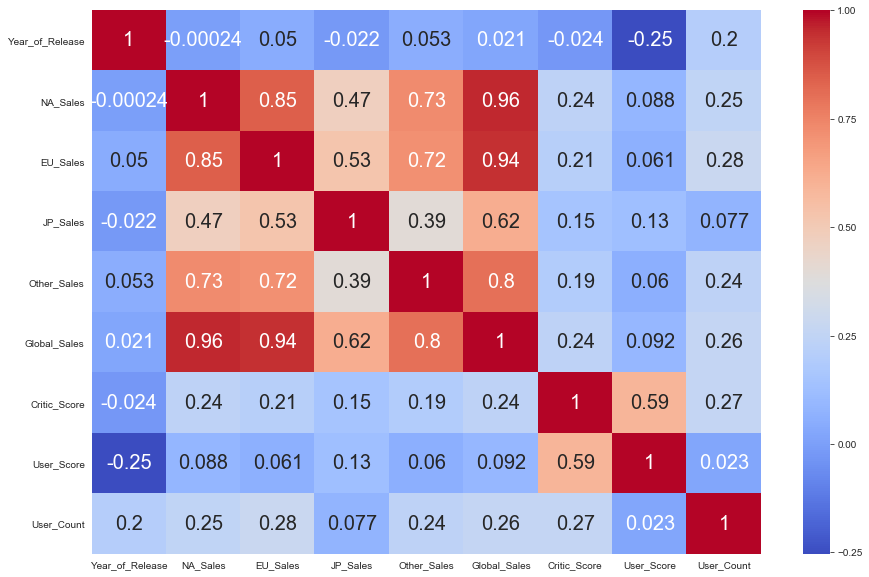

In [308]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr, annot = True, annot_kws ={'size':20}, cmap='coolwarm')


### OLM for Global_Sales~NA_Sales

In [167]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~NA_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 7.175e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:13:21   Log-Likelihood:                -97623.
No. Observations:                6644   AIC:                         1.952e+05
Df Residuals:                    6642   BIC:                         1.953e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8535.3923   7720.928      1.105      0.269   -6600.107    2.37e+04
NA_Sales       1.9459      0.007    267.870      0.000       1.932       1.960
==============================================================================
Omnibus:                     6540.893   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1229684.939
Skew:                           4.319   Prob(JB):                         0.00
Kurtosis:                      69.086   Cond. No.                     1.15e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for Global_Sales~EU_Sales

In [177]:
abs(corr).sort_values(by = 'Global_Sales',  ascending= False)['Global_Sales']
data_reg_simple = ols(formula= "Global_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Global_Sales   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 5.167e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:26:56   Log-Likelihood:                -98606.
No. Observations:                6644   AIC:                         1.972e+05
Df Residuals:                    6642   BIC:                         1.972e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.46e+05   8758.898     16.669      0.000    1.29e+05    1.63e+05
EU_Sales       2.7110      0.012    227.302      0.000       2.688       2.734
==============================================================================
Omnibus:                     7298.418   Durbin-Watson:                   1.902
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          6851978.048
Skew:                           4.702   Prob(JB):                         0.00
Kurtosis:                     160.044   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for NA_Sales~EU_Sales

In [179]:
abs(corr).sort_values(by = 'NA_Sales',  ascending= False)['NA_Sales']
data_reg_simple = ols(formula= "NA_Sales~EU_Sales", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               NA_Sales   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                 1.703e+04
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:28:38   Log-Likelihood:                -96884.
No. Observations:                6644   AIC:                         1.938e+05
Df Residuals:                    6642   BIC:                         1.938e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.166e+05   6758.872     17.247      0.000    1.03e+05     1.3e+05
EU_Sales       1.2010      0.009    130.490      0.000       1.183       1.219
==============================================================================
Omnibus:                     4073.255   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1189199.408
Skew:                           1.762   Prob(JB):                         0.00
Kurtosis:                      68.447   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLM for Critic_Score~User_Score

In [182]:
abs(corr).sort_values(by = 'Critic_Score',  ascending= False)['Critic_Score']
data_reg_simple = ols(formula= "Critic_Score~User_Score", data=data_le).fit()
data_reg_simple.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Critic_Score   R-squared:                       0.347
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     3534.
Date:                Mon, 09 Dec 2019   Prob (F-statistic):               0.00
Time:                        16:29:28   Log-Likelihood:                -25521.
No. Observations:                6644   AIC:                         5.105e+04
Df Residuals:                    6642   BIC:                         5.106e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     28.8933      0.708     40.820      0.000      27.506      30.281
User_Score     5.7322      0.096     59.448      0.000       5.543       5.921
==============================================================================
Omnibus:                      119.955   Durbin-Watson:                   1.152
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              131.560
Skew:                          -0.301   Prob(JB):                     2.70e-29
Kurtosis:                       3.335   Cond. No.                         38.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking the relationships between the different categories

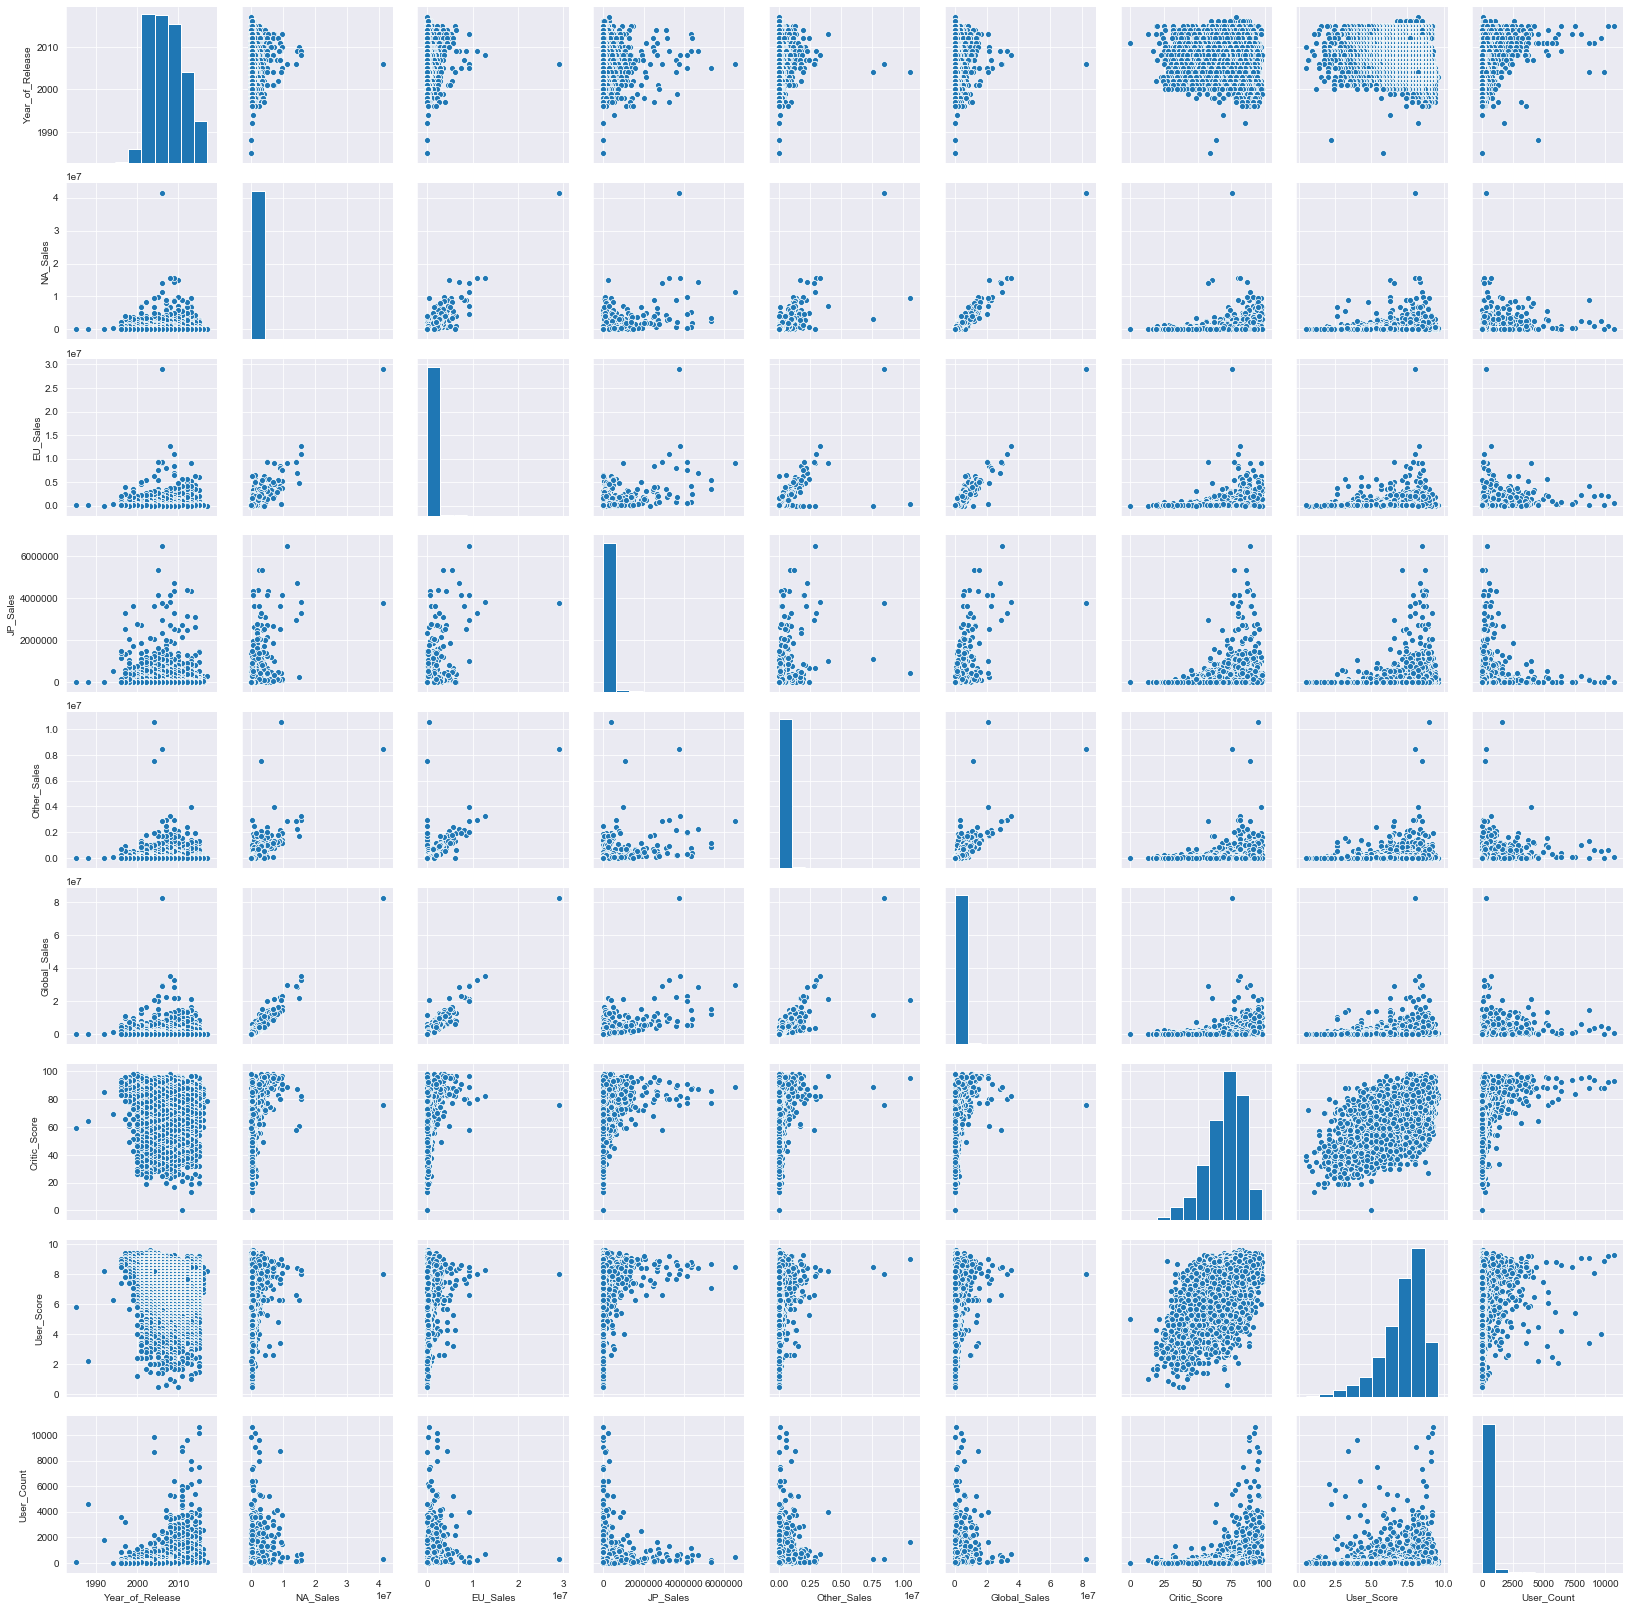

In [174]:
sns.pairplot(data_le, kind='scatter', dropna=True)

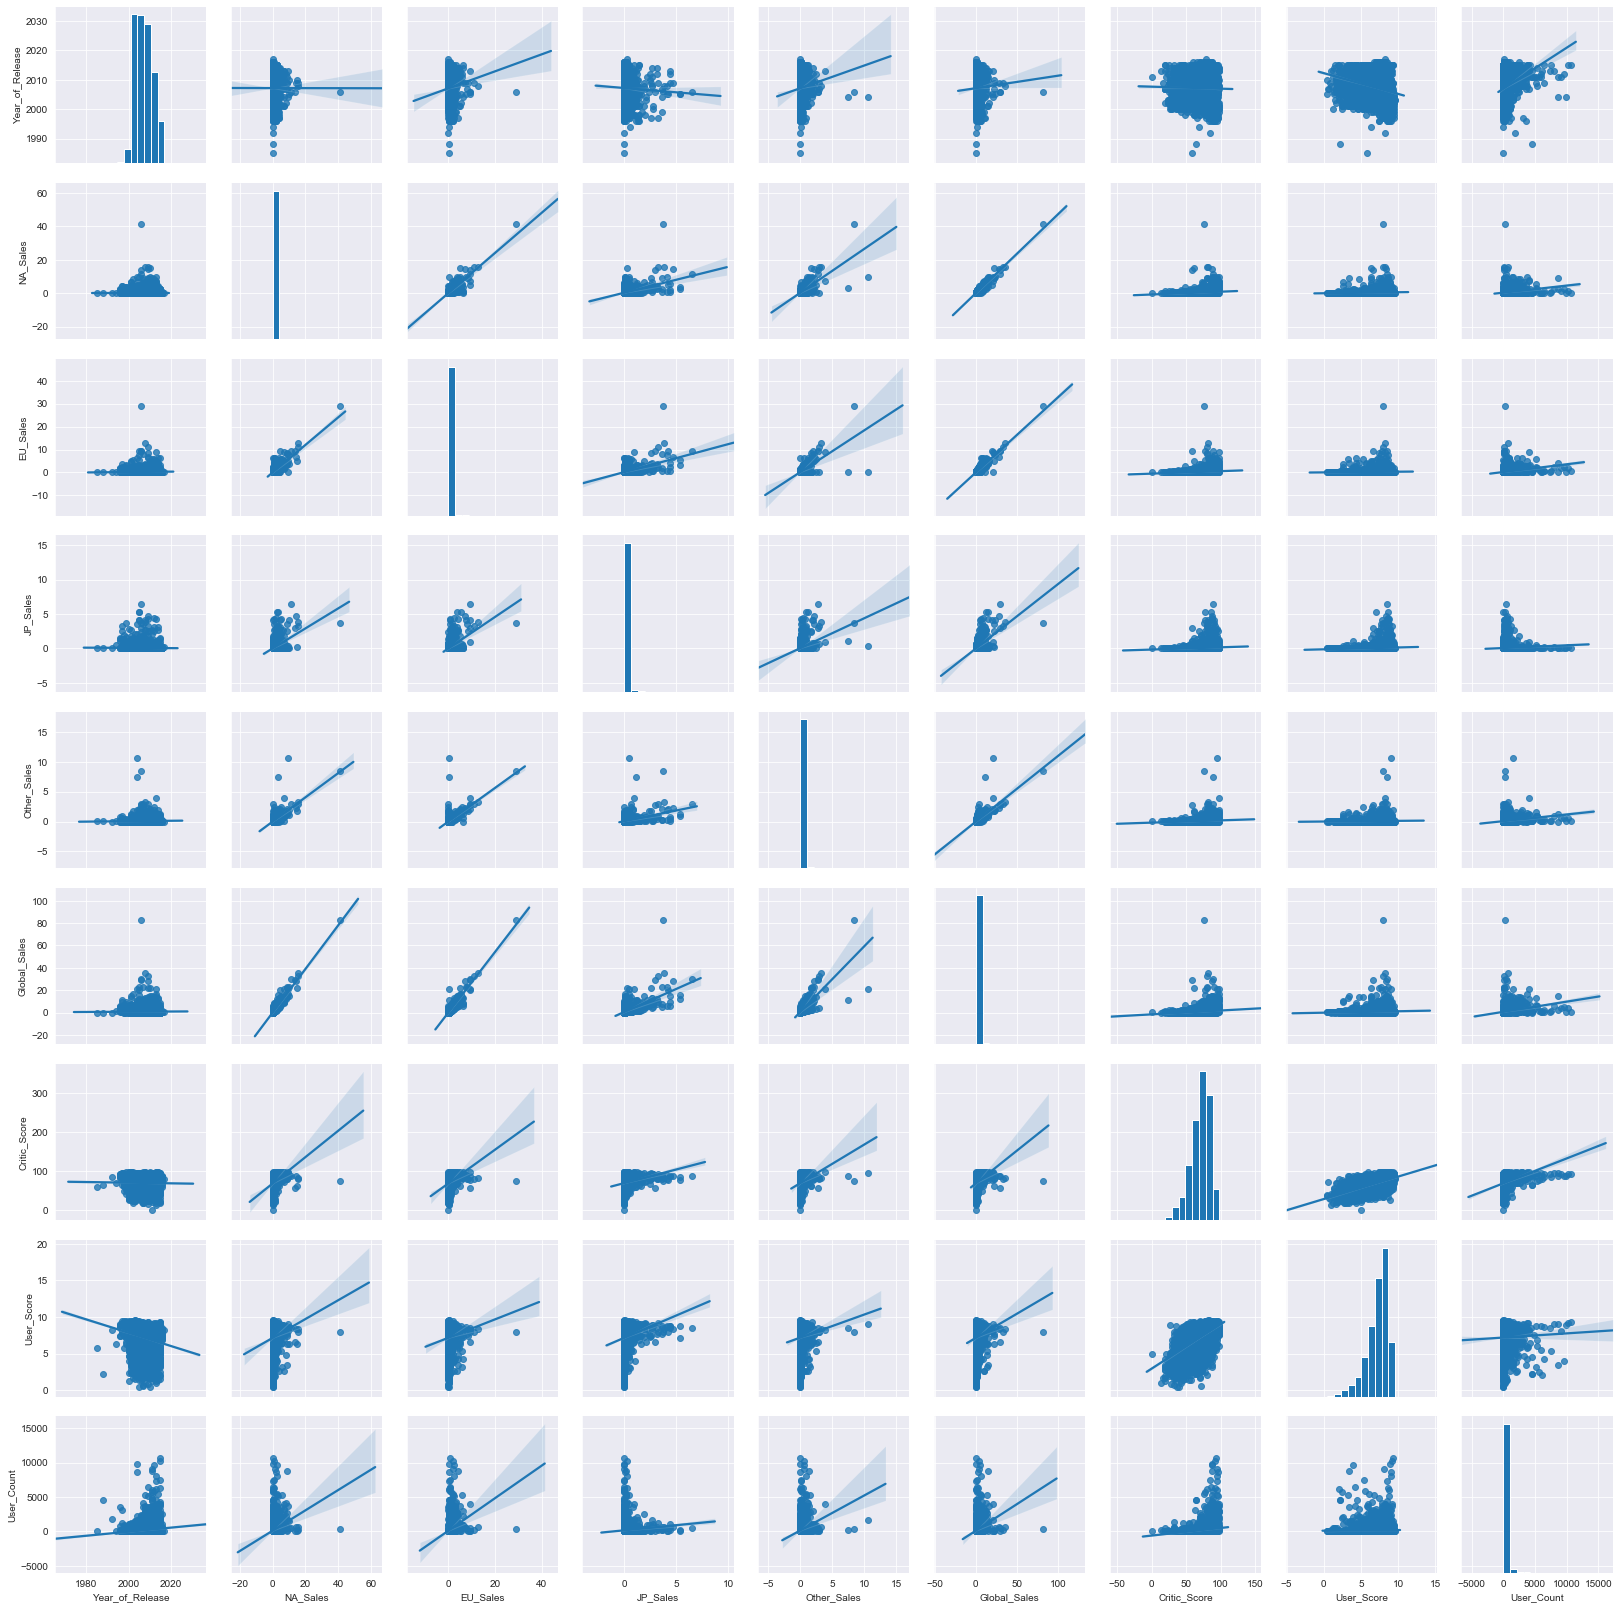

In [125]:
sns.pairplot(data_le, kind='reg' )

Visualizing relationship with each column of my dataset

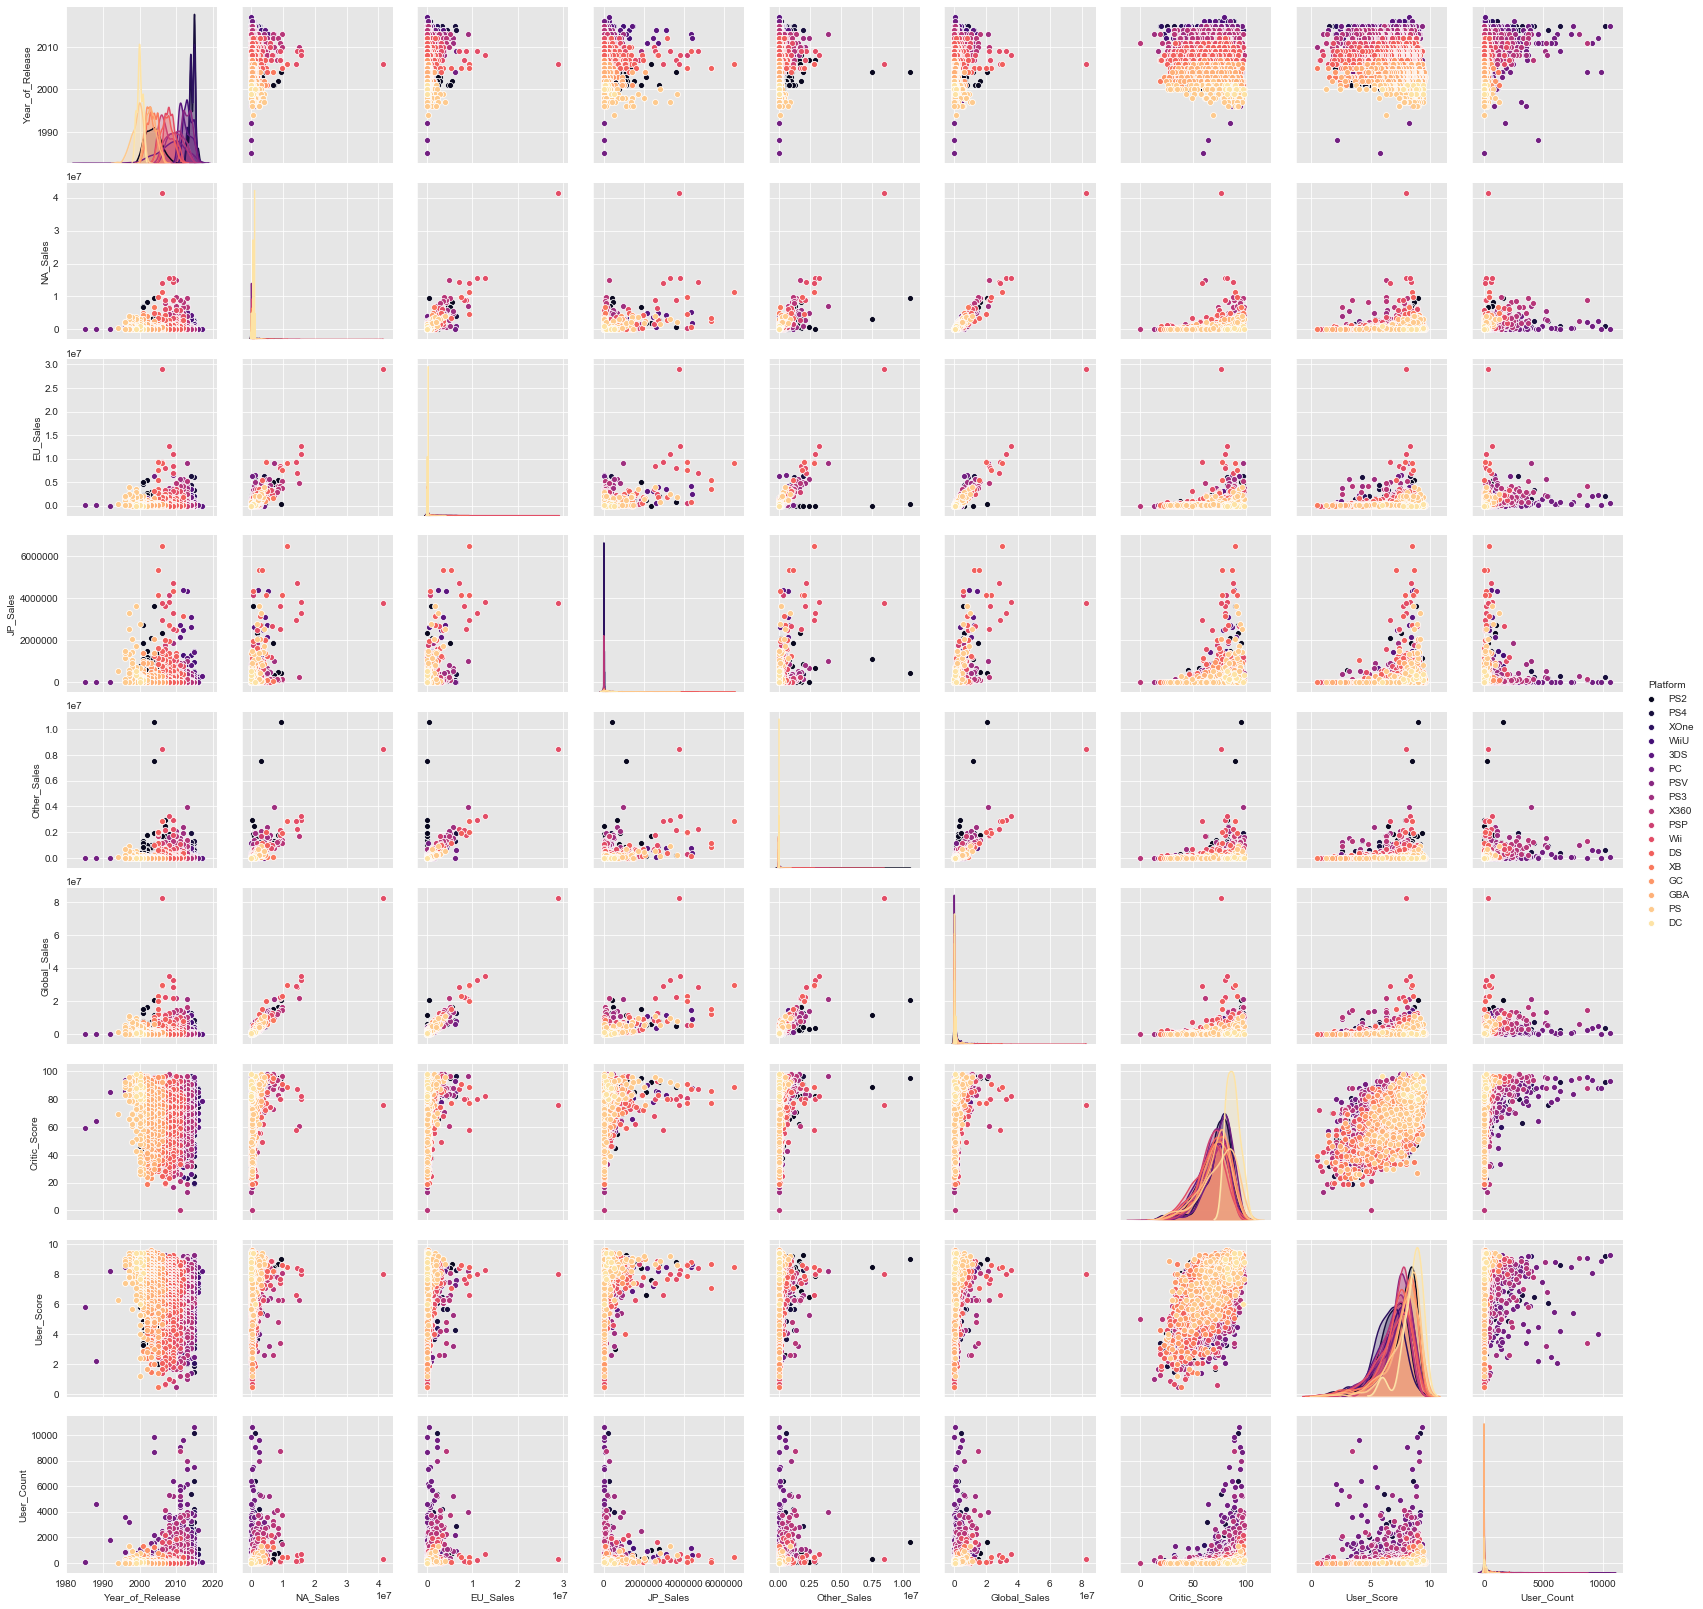

In [326]:
sns.pairplot(data_le, hue ='Platform', palette ='magma')

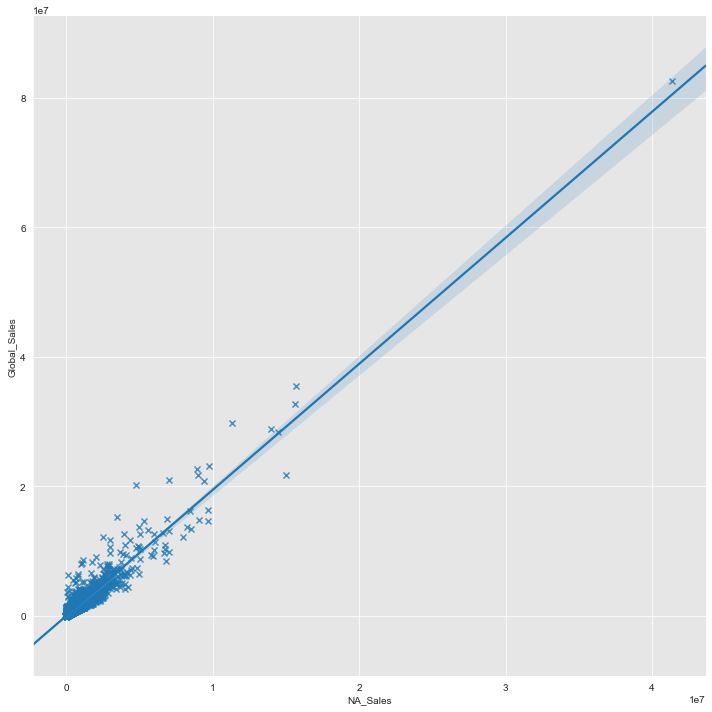

In [325]:

sns.lmplot(x='NA_Sales', y='Global_Sales', data= data_le, markers=[ "x"], fit_reg =True,size = 10)


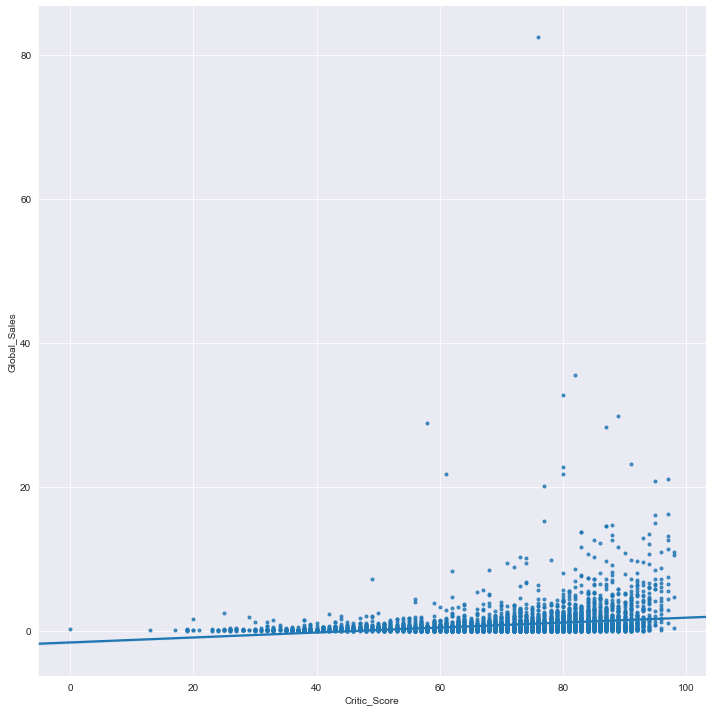

In [263]:
sns.lmplot(x='Critic_Score', y='Global_Sales', data= data_le, markers=[ "."], fit_reg =True,size = 10)

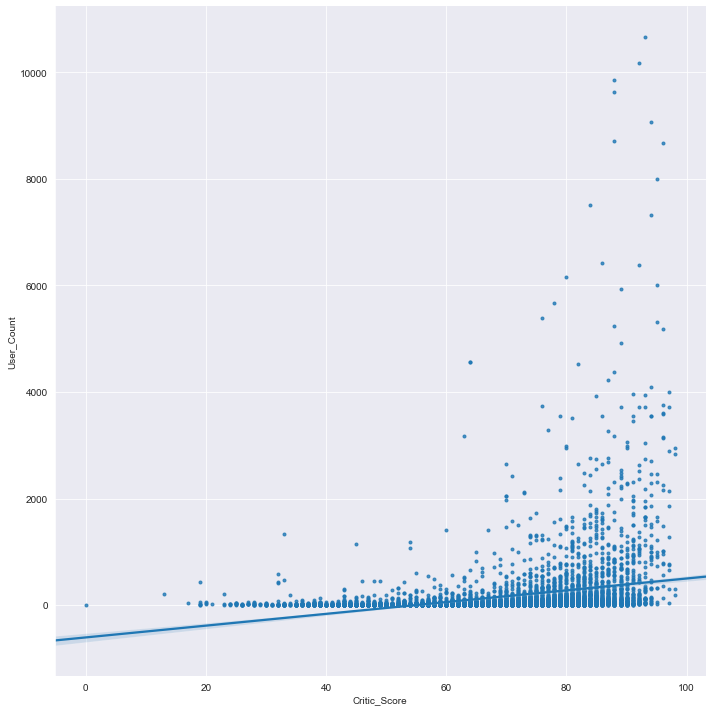

In [267]:
sns.lmplot(x='Critic_Score', y='User_Count', data= data_le, markers=["."], fit_reg =True,size = 10)

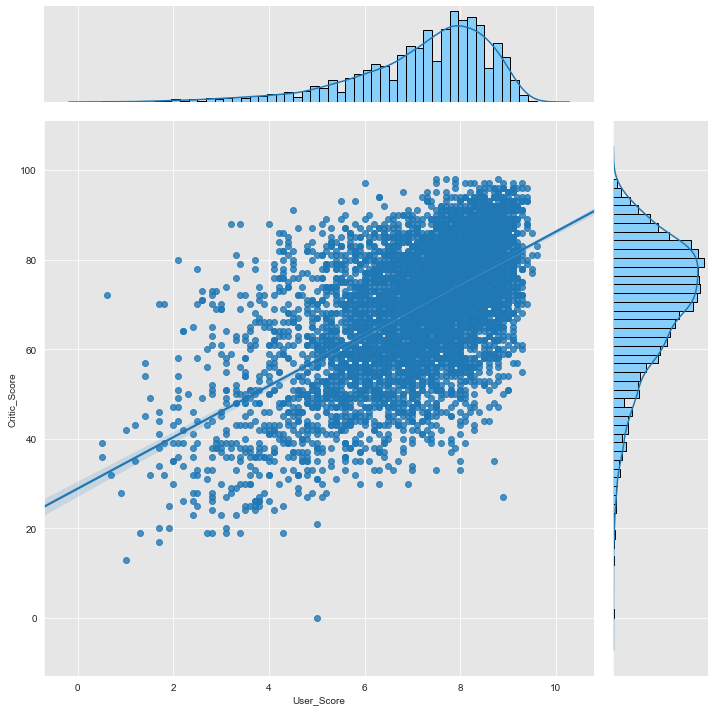

In [376]:
sns.jointplot(x="User_Score", y="Critic_Score", data=data_le, kind="reg", 
                  size=10, marginal_kws={"hist_kws" : {"edgecolor": "black", "color": "lightskyblue", "alpha": 1}})

Box plot of the relationship for type against rank and score

TypeError: can't multiply sequence by non-int of type 'float'

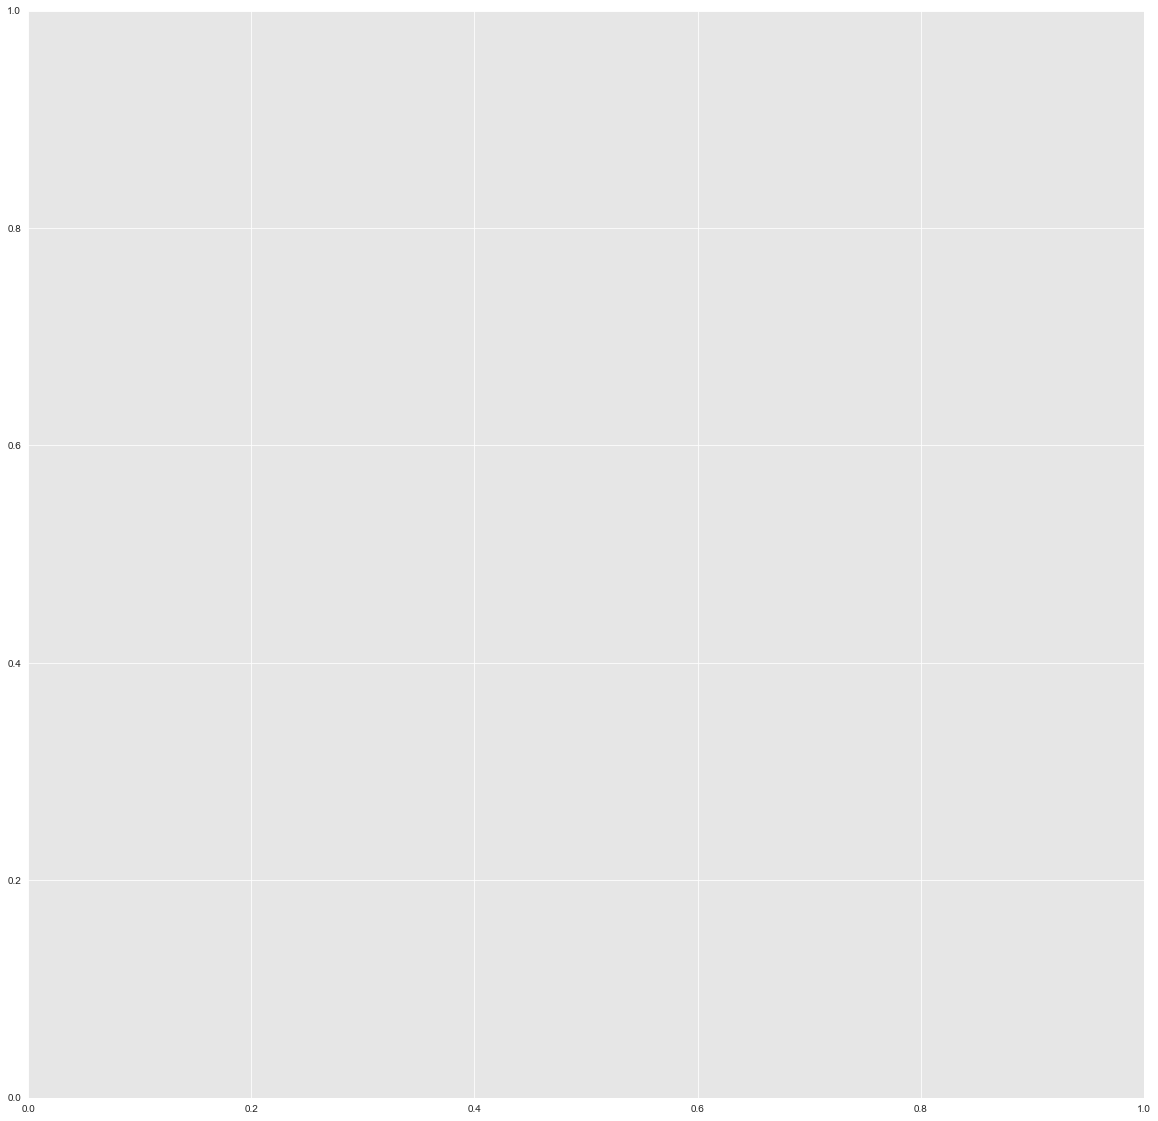

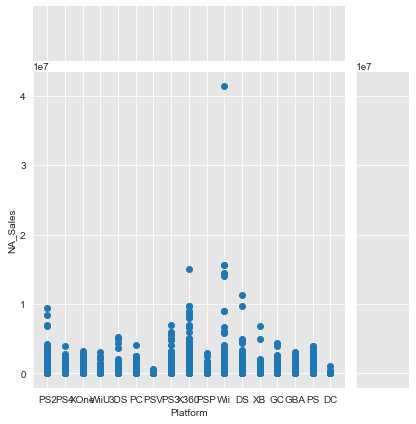

In [361]:
fig, ax = plt.subplots(figsize=(20,20))
sns.stripplot(data=data_le, x='Platform',y= 'NA_Sales' , orient='v', palette ='magma')
# plt.gca().invert_yaxis()
plt.ylim()
plt.xticks(rotation=45)

In [184]:
data_le

Name Platform  \
180                           wwe Smackdown vs. Raw 2006      PS2   
181                          The Elder Scrolls V: Skyrim      PS4   
182                              Rise of the Tomb Raider      PS4   
183                                     MLB 16: The Show      PS4   
184                                          Doom (2016)     XOne   
185                          The Elder Scrolls V: Skyrim     XOne   
186                                            Minecraft     WiiU   
189          Mario & Sonic at the Rio 2016 Olympic Games      3DS   
190                                      Hyrule Warriors      3DS   
192                                F1 2016 (Codemasters)      PS4   
193                                   Resident Evil Zero      PS4   
195          Mario & Sonic at the Rio 2016 Olympic Games     WiiU   
198    Dragon Quest Heroes II: Twin Kings and the Pro...      PS4   
199                               Monster Hunter Stories      3DS   
200                               Attack on Titan (KOEI)      PS4   
205                                          Doom (2016)       PC   
206                                  Valkyria Chronicles      PS4   
421                             The Witcher 3: Wild Hunt       PC   
422                                        Steins;Gate 0      PSV   
423                             The Witcher 3: Wild Hunt      PS4   
424                             The Witcher 3: Wild Hunt     XOne   
425                The Legend of Zelda: Majora's Mask 3D      3DS   
426                                     Cities: Skylines       PC   
427                               Xenoblade Chronicles X     WiiU   
428                         Brothers: A Tale of Two Sons     XOne   
429                                        Grand Kingdom      PSV   
430                        Pokemon Super Mystery Dungeon      3DS   
435                                    Super Mario Maker     WiiU   
436                                          Stella Glow      3DS   
437                                           Bloodborne      PS4   
...                                                  ...      ...   
14663                                      Strikers 1945       PS   
14665                                 Grand Theft Auto 2       PS   
14666                              Gundam Battle Assault       PS   
14667                                  Silhouette Mirage       PS   
14668                                   Vanguard Bandits       PS   
14669                Clock Tower II: The Struggle Within       PS   
15019                 Castlevania: Symphony of the Night       PS   
15020                                  Final Fantasy VII       PS   
15021                                          Half-Life       PC   
15022                                            Alundra       PS   
15023                            Oddworld: Abe's Oddysee       PS   
15025                          Tenchu: Stealth Assassins       PS   
15026                                       Gran Turismo       PS   
15029                              Final Fantasy Tactics       PS   
15030                                       Ace Combat 2       PS   
15031                                          RPG Maker       PS   
15033                                      Bushido Blade       PS   
15034                                        Colony Wars       PS   
15035                                           RayStorm       PS   
15307                                      Resident Evil       PS   
15308                                           Tekken 2       PS   
15309                                             Diablo       PC   
15311                                        Tomb Raider       PS   
15312                                        Tomb Raider       PC   
15313                                 PaRappa The Rapper       PS   
15314                      Super Puzzle Fighter II Turbo       PS   
15789                             Battle Arena Tos

(-100, 16500000)

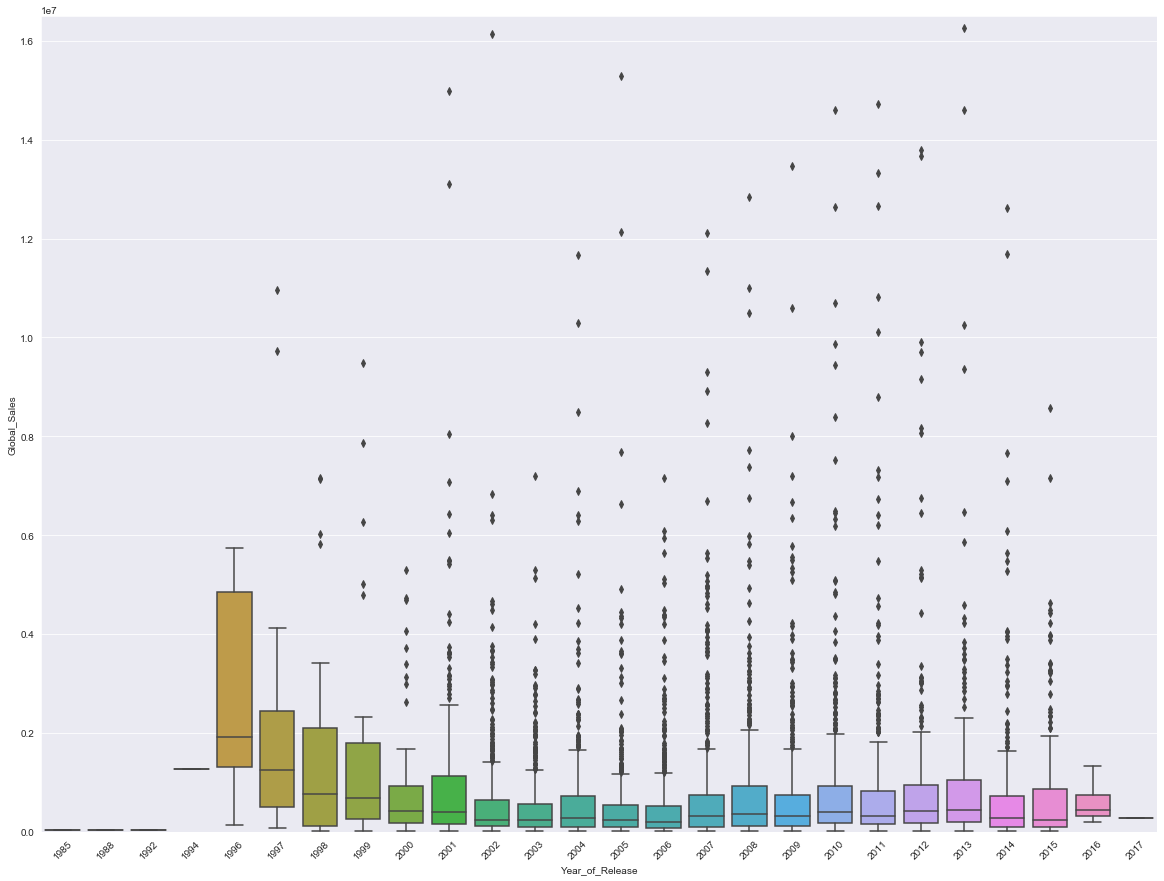

In [297]:
fig, ax = plt.subplots(figsize=(20,15))
sns.boxplot(data=data_le, x='Year_of_Release' ,y= 'Global_Sales', orient='v', )
plt.xticks(rotation=45)
# had to limit y axis the graph was very small (one outlier on 2006 @ 8.2 million not shown)
plt.ylim(-100,16500000) 

Swarmplot of the relationship between the source and score with the different colors showing the rating (where 0 is all ages and brown is R+)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text xticklabel objects>)

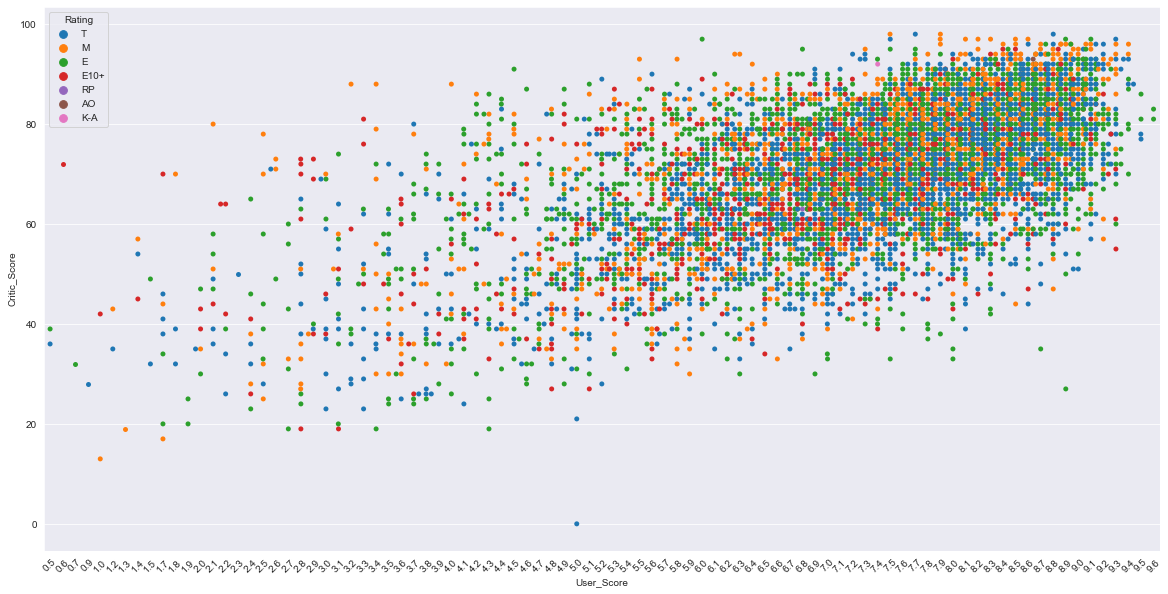

In [205]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='User_Score', y= 'Critic_Score', size=5, hue='Rating')
plt.xticks(rotation =45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81]),
 <a list of 82 Text xticklabel objects>)

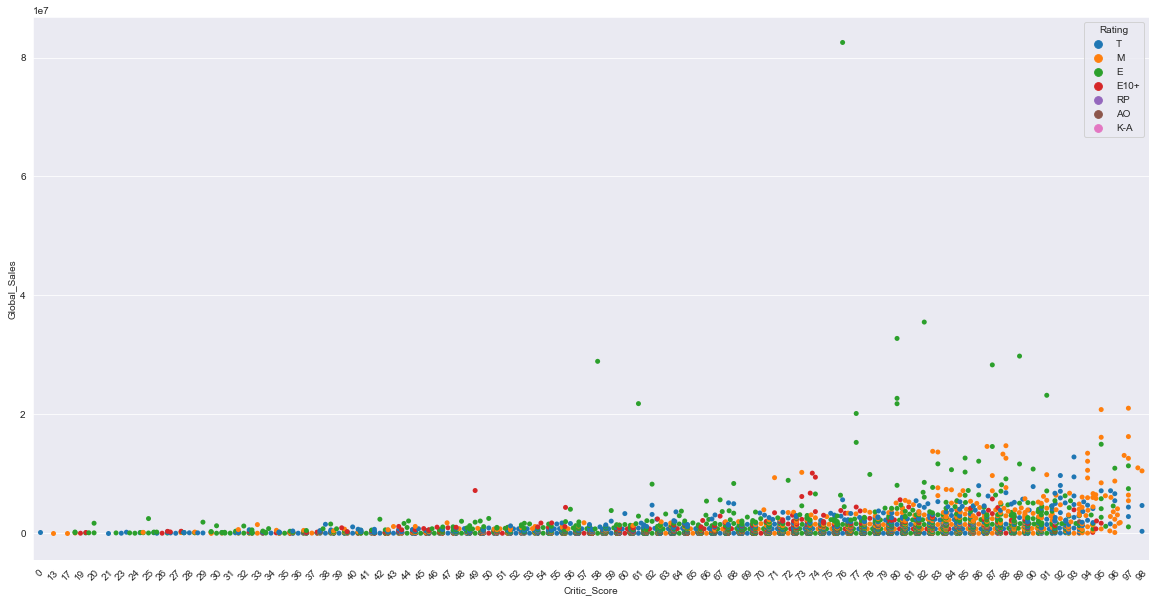

In [287]:
fig, ax = plt.subplots(figsize=(20,10))
sns.swarmplot(data=data_le, x='Critic_Score', y= 'Global_Sales', size=5, hue='Rating', )
plt.xticks(rotation =45)


In [25]:
data.columns

Index(['name', 'type', 'source', 'episodes', 'duration', 'rating', 'score',
       'scored_by', 'rank', 'popularity', 'members', 'favorites'],
      dtype='object')

SyntaxError: invalid syntax (<ipython-input-232-512790f51e30>, line 1)

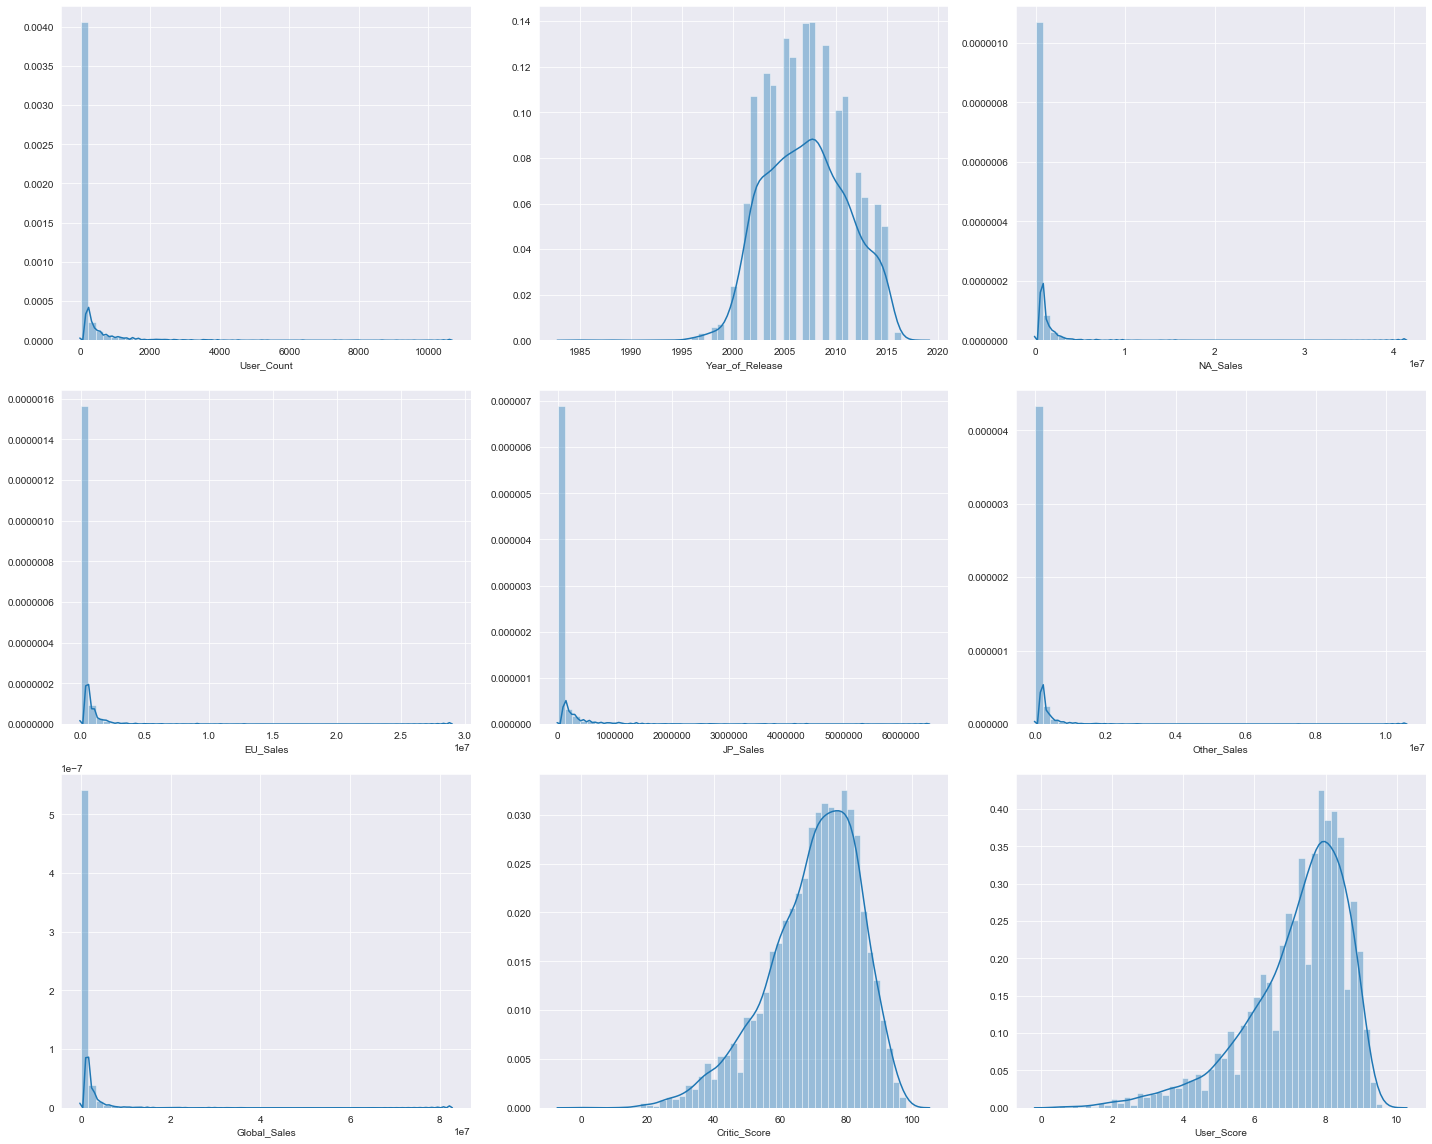

In [294]:
rows = 3
cols = 3
fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize = (20,16))
col = data_le_nums.columns
index = -1
for i in range(rows):
    for j in range(cols):
        sns.distplot(data_le_nums[col[index]], ax = ax[i][j])
        index = index + 1
plt.tight_layout()

### This pairing showed the highest correlation

# Global Sales vs North American Sales

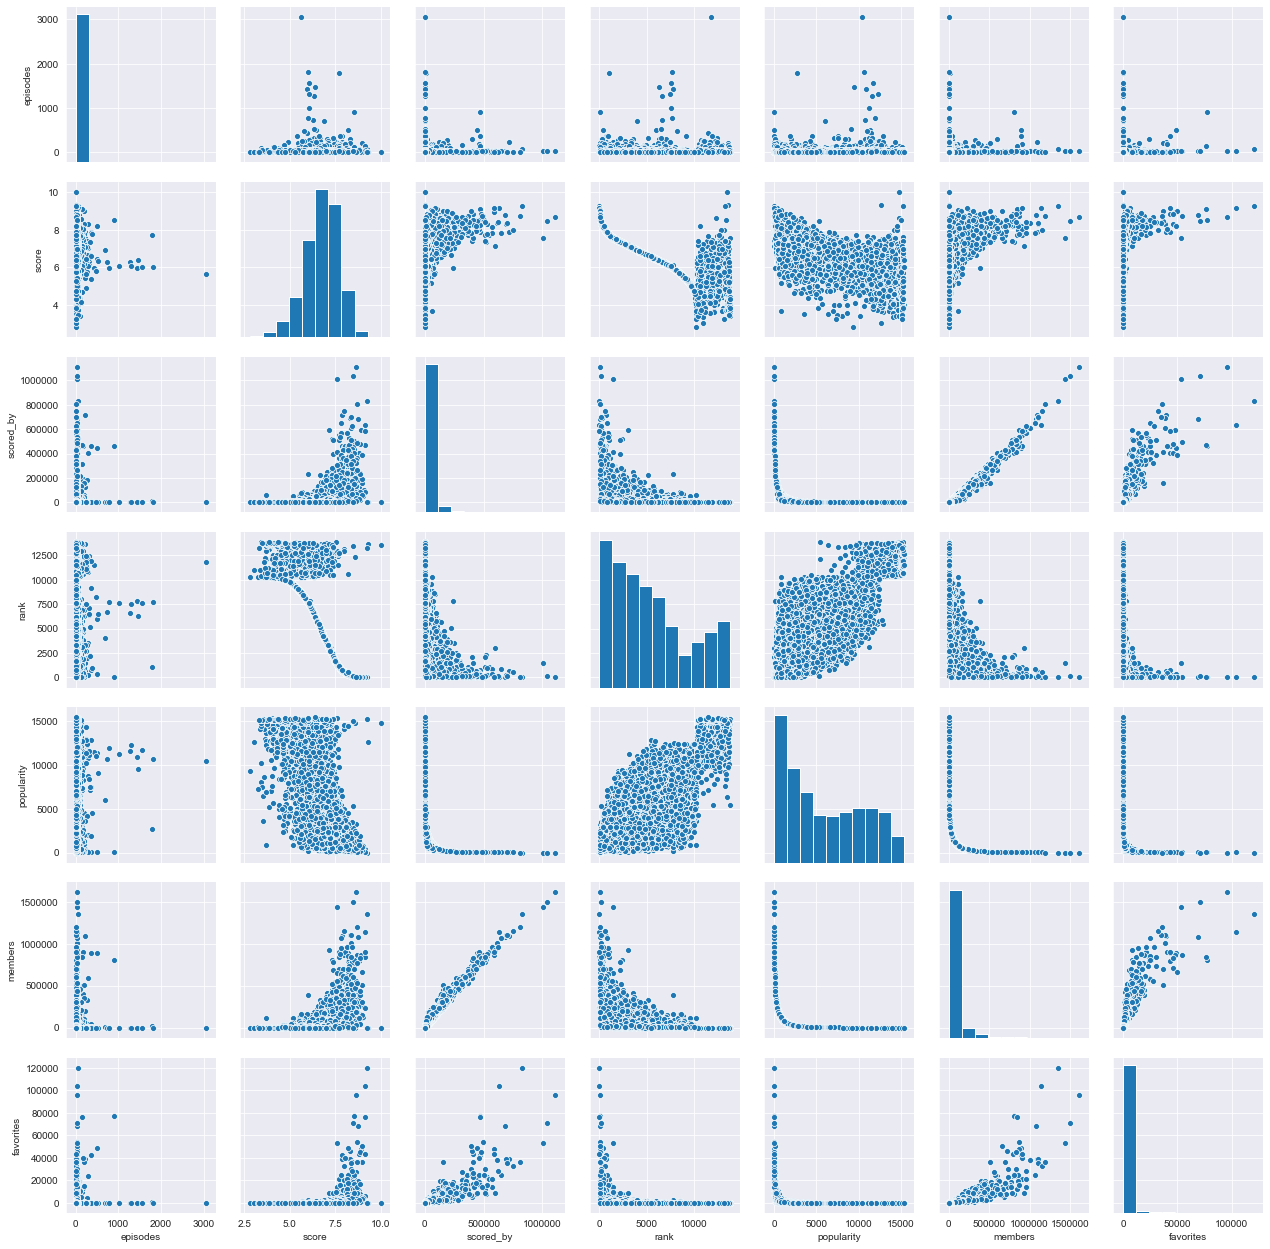

In [26]:
sns.pairplot(data_number_set)

In [338]:
data_le_nums

Year_of_Release   NA_Sales   EU_Sales   JP_Sales  Other_Sales  \
180               2005  1570000.0  1020000.0        0.0     410000.0   
181               2016   480000.0   590000.0    40000.0     210000.0   
182               2016   230000.0   530000.0    40000.0     140000.0   
183               2016   720000.0        0.0        0.0     170000.0   
184               2016   440000.0   250000.0        0.0      70000.0   
185               2016   410000.0   270000.0        0.0      70000.0   
186               2016   280000.0   170000.0   180000.0      40000.0   
189               2016    50000.0   210000.0   250000.0      20000.0   
190               2016   170000.0   130000.0   110000.0      30000.0   
192               2016    30000.0   290000.0    10000.0      50000.0   
193               2016   100000.0   170000.0    50000.0      50000.0   
195               2016    70000.0   140000.0   110000.0      20000.0   
198               2016        0.0        0.0   280000.0          0.0   
199               2017        0.0        0.0   280000.0          0.0   
200               2016    40000.0   110000.0   110000.0      30000.0   
205               2016    70000.0   130000.0        0.0      20000.0   
206               2016    70000.0    50000.0    50000.0      30000.0   
421               2015   210000.0   460000.0        0.0      50000.0   
422               2015        0.0    30000.0    50000.0      10000.0   
423               2015  1020000.0  2130000.0   230000.0     590000.0   
424               2015   690000.0   500000.0        0.0     110000.0   
425               2015  1150000.0   550000.0   470000.0     170000.0   
426               2015        0.0   130000.0        0.0      10000.0   
427               2015   360000.0   280000.0   140000.0      60000.0   
428               2015    30000.0    10000.0        0.0          0.0   
429               2015    10000.0    10000.0    40000.0      10000.0   
430               2015   480000.0   350000.0   340000.0      80000.0   
435               2015  1180000.0   890000.0   940000.0     200000.0   
436               2015   160000.0    10000.0    50000.0      20000.0   
437               2015  1030000.0   810000.0   260000.0     380000.0   
...                ...        ...        ...        ...          ...   
14663             1998    70000.0    50000.0        0.0      10000.0   
14665             1998  1130000.0  2070000.0        0.0     220000.0   
14666             1998   130000.0    90000.0        0.0      20000.0   
14667             1998    30000.0    20000.0        0.0          0.0   
14668             1998    40000.0    30000.0        0.0          0.0   
14669             1998    20000.0    10000.0   120000.0      10000.0   
15019             1997   580000.0   400000.0   210000.0      80000.0   
15020             1997  3010000.0  2470000.0  3280000.0     960000.0   
15021             1997  4030000.0        0.0    90000.0          0.0   
15022             1997   130000.0    90000.0        0.0      10000.0   
15023             1997   750000.0   440000.0        0.0      60000.0   
15025             1997   950000.0   640000.0   270000.0     130000.0   
15026             1997  4020000.0  3870000.0  2540000.0     520000.0   
15029             1997   930000.0   120000.0  1340000.0      60000.0   
15030             1997   160000.0   110000.0   560000.0      60000.0   
15031             1997   110000.0    70000.0   290000.0      30000.0   
15033             1997   390000.0   270000.0   430000.0      80000.0   
15034             1997   240000.0   160000.0        0.0      30000.0   
15035             1997    40000.0    30000.0        0.0          0.0   
15307             1996  2050000.0  1160000.0  1110000.0     730000.0   
15308             1996  2260000.0  1890000.0  1360000.0     230000.0   
15309             1996    10000.0  1580000.0        0.0          0.0   
15311             1996  2290000.0  1970000.0   130000.0     240000.0   
15312             1996   960000.0    70000.0   

In [340]:
data_le_nums.iloc[:,1]

180      1570000.0
181       480000.0
182       230000.0
183       720000.0
184       440000.0
185       410000.0
186       280000.0
189        50000.0
190       170000.0
192        30000.0
193       100000.0
195        70000.0
198            0.0
199            0.0
200        40000.0
205        70000.0
206        70000.0
421       210000.0
422            0.0
423      1020000.0
424       690000.0
425      1150000.0
426            0.0
427       360000.0
428        30000.0
429        10000.0
430       480000.0
435      1180000.0
436       160000.0
437      1030000.0
           ...    
14663      70000.0
14665    1130000.0
14666     130000.0
14667      30000.0
14668      40000.0
14669      20000.0
15019     580000.0
15020    3010000.0
15021    4030000.0
15022     130000.0
15023     750000.0
15025     950000.0
15026    4020000.0
15029     930000.0
15030     160000.0
15031     110000.0
15033     390000.0
15034     240000.0
15035      40000.0
15307    2050000.0
15308    2260000.0
15309      1

In [353]:
#selecting the columns in the data and labeling them 
year = data_le_nums.iloc[:,0]
na_sales=data_le_nums.iloc[:,1]
eu_sales=data_le_nums.iloc[:,2]
global_sales=data_le_nums.iloc[:,5]
critic_score=data_le_nums.iloc[:,6]
user_score=data_le_nums.iloc[:,7]
user_count=data_le_nums.iloc[:,8]

#Assigning X and y values aswell as the train and test of X and y

X1 = global_sales.values.reshape(-1,1)
y1 = na_sales.values.reshape(-1)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size=0.3, random_state=3)



In [342]:
y1_test.shape

(1994,)

Preformed a Cross Validation on Linear Regression because it was the most accurate

In [343]:
# Linear Regression
lr = LinearRegression()
lr.fit(X1_train,y1_train)
y1_pred_lr = lr.predict(X1_test)
#testing the accuracy of the train and test 
lr_accuracy_train = lr.score(X1_train,y1_train)
lr_accuracy_test = lr.score(X1_test,y1_test)


print(f'Linear Regression train accuracy is: {lr_accuracy_train}\nLinear Regression test accuracy is: {lr_accuracy_test}')

# Cross Validation - Linear Regression

lr_cross_val_score = cross_val_score(lr, X1,y1, cv=10)
lr_cv_score_avg = lr_cross_val_score.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg}')
cv_pred_lr = cross_val_predict(lr, X1_test, y1_test, cv=10)



Linear Regression train accuracy is: 0.8973101799840704
Linear Regression test accuracy is: 0.9329179687014237
Avg Cross Val Linear Regression is: 0.8825866984796258


In [344]:
scored_by_test = X1_test.reshape(1, -1)
members_test = y1_test.reshape(1, -1)
lr_members_predict = y1_pred_lr.reshape(1, -1)
cross_val_lr_members_predict = cv_pred_lr.reshape(1, -1)

d1 = pd.DataFrame(np.hstack([y1_test]))
d2 = pd.DataFrame(np.hstack([y1_pred_lr]))
d3 = pd.DataFrame(np.hstack([cv_pred_lr]))

# pd.DataFrame([[y1_test],[y1_pred_lr],[cv_pred_lr]])
# df1_transposed = df1.transpose()
df1 = pd.DataFrame(data=d1)
df2 = pd.DataFrame(data=d2)
df3 = pd.DataFrame(data=d3)


pd.DataFrame(np.concatenate([df1, df2, df3], axis=1), columns= ['Test set Members','Linear Reg Predicted Members','Cross Val. Linear Reg Predicted Members '])



Test set Members  Linear Reg Predicted Members  \
0            8410000.0                  7.453289e+06   
1              20000.0                  5.248032e+04   
2             120000.0                  1.534839e+05   
3             380000.0                  3.922197e+05   
4                  0.0                  7.084461e+04   
5              40000.0                  7.084461e+04   
6              70000.0                  8.461782e+04   
7             320000.0                  2.315321e+05   
8             220000.0                  2.315321e+05   
9             900000.0                  1.466531e+06   
10            240000.0                  3.003982e+05   
11                 0.0                  5.707139e+04   
12            500000.0                  2.912161e+05   
13            280000.0                  2.544875e+05   
14             30000.0                  8.920890e+04   
15            910000.0                  5.391340e+05   
16            100000.0                  1.259375e+05   
17             10000.0                  5.345429e+05   
18            130000.0                  2.453054e+05   
19             20000.0                  8.002675e+04   
20            840000.0                  6.401376e+05   
21            230000.0                  1.810303e+05   
22             90000.0                  3.141714e+05   
23             70000.0                  8.002675e+04   
24            100000.0                  9.839104e+04   
25             80000.0                  1.121643e+05   
26             80000.0                  8.002675e+04   
27           1050000.0                  1.315025e+06   
28            100000.0                  9.839104e+04   
29            240000.0                  1.718482e+05   
...                ...                           ...   
1964          330000.0                  3.968108e+05   
1965           70000.0                  1.351196e+05   
1966        15000000.0                  1.005184e+07   
1967          270000.0                  1.856214e+05   
1968          380000.0                  4.381304e+05   
1969          200000.0                  1.580750e+05   
1970           10000.0                  6.625353e+04   
1971          480000.0                  2.820339e+05   
1972           30000.0                  5.707139e+04   
1973          960000.0                  6.722751e+05   
1974          640000.0                  4.932233e+05   
1975          140000.0                  1.718482e+05   
1976          100000.0                  1.305285e+05   
1977          120000.0                  4.105840e+05   
1978               0.0                  5.707139e+04   
1979         1550000.0                  1.618036e+06   
1980          860000.0                  4.886322e+05   
1981           60000.0                  7.543568e+04   
1982           10000.0                  4.788924e+04   
1983          220000.0                  1.764393e+05   
1984           10000.0                  4.788924e+04   
1985         3130000.0                  2.467384e+06   
1986         4030000.0                  1.930229e+06   
1987          160000.0                  1.213464e+05   
1988          190000.0                  1.534839e+05   
1989          350000.0                  2.269411e+05   
1990           20000.0                  4.788924e+04   
1991          120000.0                  1.259375e+05   
1992          350000.0                  2.131679e+05   
1993          120000.0                  1.488928e+05   

      Cross Val. Linear Reg Predicted Members   
0                                 7.785304e+06  
1                                 3.528912e+04  
2                                 1.410585e+05  
3                                 3.910590e+05  
4                                 5.451992e+04  
5                                 5.451992e+04  
6                                 6.894303e+04  
7                                 2.227895e+05  
8                                 2.227895e+05  
9                                 1.516061e

In [345]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X1_train,y1_train)
y1_pred_rr = rr.predict(X1_test)

rr_accuracy_train = rr.score(X1_train,y1_train)
rr_accuracy_test = rr.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 0.01 train accuracy is: {rr_accuracy_train}\nRidge Regression @ alpha = 0.01 test accuracy is: {rr_accuracy_test}')

rr100 = Ridge(alpha=100)
rr100.fit(X1_train,y1_train)
y1_pred_rr100 = rr100.predict(X1_test)

rr100_accuracy_train = rr100.score(X1_train,y1_train)
rr100_accuracy_test = rr100.score(X1_test,y1_test)
 
print(f'Ridge Regression @ alpha = 100 train accuracy is:  {rr100_accuracy_train}\nRidge Regression @ alpha = 100 test accuracy is:  {rr100_accuracy_test}')


# Cross Validation - Linear Regression

rr_cross_val_score = cross_val_score(rr, X1,y1, cv=10)
rr_cv_score_avg = rr_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 0.01 is: {rr_cv_score_avg}')
cv_pred_rr = cross_val_predict(rr, X1_test, y1_test, cv=10)


# Cross Validation - Linear Regression

rr100_cross_val_score = cross_val_score(rr100, X1,y1, cv=10)
rr100_cv_score_avg = rr100_cross_val_score.mean()
print(f'Avg Cross Val Ridge Regression alpha @ 100 is:  {rr100_cv_score_avg}')
cv_pred_rr100 = cross_val_predict(rr100, X1_test, y1_test, cv=10)


Ridge Regression @ alpha = 0.01 train accuracy is: 0.8973101799840704
Ridge Regression @ alpha = 0.01 test accuracy is: 0.9329179687014237
Ridge Regression @ alpha = 100 train accuracy is:  0.8973101799840704
Ridge Regression @ alpha = 100 test accuracy is:  0.9329179687014231
Avg Cross Val Ridge Regression alpha @ 0.01 is: 0.8825866984796258
Avg Cross Val Ridge Regression alpha @ 100 is:  0.8825866984796262


In [346]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01,max_iter=5560)
lasso01.fit(X1_train,y1_train)
y1_pred_lasso01 = lasso01.predict(X1_test)

lasso01_accuracy_train = lasso01.score(X1_train,y1_train)

lasso01_accuracy_test = lasso01.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train}\nLasso Regression @ alpha 0.01 test accuracy is:  {lasso01_accuracy_test}')

lasso05 = Lasso(alpha=0.05,max_iter=5560)
lasso05.fit(X1_train,y1_train)
y1_pred_lasso05 = lasso05.predict(X1_test)

lasso05_accuracy_train = lasso05.score(X1_train,y1_train)

lasso05_accuracy_test = lasso05.score(X1_test,y1_test)
 
print(f'Lasso Regression @ alpha 0.05 train accuracy is: {lasso05_accuracy_train}\nLasso Regression @ alpha 0.05 test accuracy is:  {lasso05_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)

lasso05_cross_val_score = cross_val_score(lasso05, X1,y1, cv=10)
lasso05_cv_score_avg = lasso05_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.05 is: {lasso05_cv_score_avg}')
cv_pred_lasso05 = cross_val_predict(lasso05, X1_test, y1_test, cv=10)

Lasso Regression @ alpha 0.01 train accuracy is: 0.8973101799840704
Lasso Regression @ alpha 0.01 test accuracy is:  0.9329179687014231
Lasso Regression @ alpha 0.05 train accuracy is: 0.8973101799840704
Lasso Regression @ alpha 0.05 test accuracy is:  0.9329179687014206
Avg Cross Val Lasso Regression alpha @ 0.01 is: 0.8825866984796262
Avg Cross Val Lasso Regression alpha @ 0.05 is: 0.8825866984796271


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1265489968529.2812, tolerance: 295998836505.0167
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1997934373317.0625, tolerance: 307623343598.88574
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3440523662542.6875, tolerance: 307586454462.3955
  positive)
//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35574757

In [347]:
#LogisticRegression
logreg= LogisticRegression(C=1,fit_intercept=True)
logreg.fit(X1_train,y1_train)
y1_pred_logreg = logreg.predict(X1_test)

logreg_accuracy_train = logreg.score(X1_train,y1_train)

logreg_accuracy_test = logreg.score(X1_test,y1_test)
                                              
                                    
print(f'Logistic Regression train accuracy is {logreg_accuracy_train} and Logistic Regression test accuracy is {logreg_accuracy_test}')


# Cross Validation - Linear Regression

lasso01_cross_val_score = cross_val_score(lasso01, X1,y1, cv=10)
lasso01_cv_score_avg = lasso01_cross_val_score.mean()
print(f'Avg Cross Val Lasso Regression alpha @ 0.01 is: {lasso01_cv_score_avg}')
cv_pred_lasso01 = cross_val_predict(lasso01, X1_test, y1_test, cv=10)


//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [349]:
# K_nearest Neighbor = 1
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X1_test, y1_test)
y1_pred_knn = knn.predict(X1_test)


# K_nearest Neighbor = 5 
knn5 = neighbors.KNeighborsClassifier(n_neighbors=5)
knn5.fit(X1_test, y1_test)
y1_pred_knn5 = knn5.predict(X1_test)



knn_accuracy_train = knn.score(X1_train,y1_train)
knn_accuracy_test = knn.score(X1_test,y1_test)

knn5_accuracy_train = knn5.score(X1_train,y1_train)
knn5_accuracy_test = knn5.score(X1_test,y1_test)


print(f'K_nearest Neighbor = 1 Regression train accuracy is {knn_accuracy_train}\nK_nearest Neighbor = 1 Regression test accuracy is {knn_accuracy_test}\n')
print(f'K_nearest Neighbor = 5 Regression train accuracy is {knn5_accuracy_train}\nK_nearest Neighbor = 5 Regression test accuracy is {knn5_accuracy_test}')


ValueError: Unknown label type: 'continuous'

In [350]:
# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X1_train,y1_train)
rf.score(X1_test,y1_test)
y1_pred_rf_1 = rf.predict(X1_test)

rf_accuracy_train_1 = rf.score(X1_train,y1_train)
rf_accuracy_test_1 = rf.score(X1_test,y1_test)
 
print(f'Random Forest Classifier train accuracy is {rf_accuracy_train_1} and Random Forest Classifier test accuracy is {rf_accuracy_test_1}')


ValueError: Unknown label type: 'continuous'

Not needed but this is used to find the optimal k nearest neighbor from the range specified


In [352]:

# k_range= range(1,20)
# scores= []
# for k in k_range:
#     kknn = neighbors.KNeighborsClassifier(n_neighbors=k)
#     knn.fit(X1_train, y1_train)
# #     y1_pred_knn = knn.predict(X1_test)
#     scores.append(knn.score(X1_test,y1_test))
# plt.plot(k_range,scores)


# Ploting the Predicted Values for each model

Original Dataset


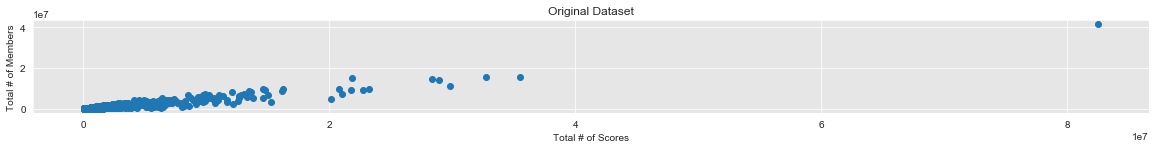

Predicted Model for Linear Regression


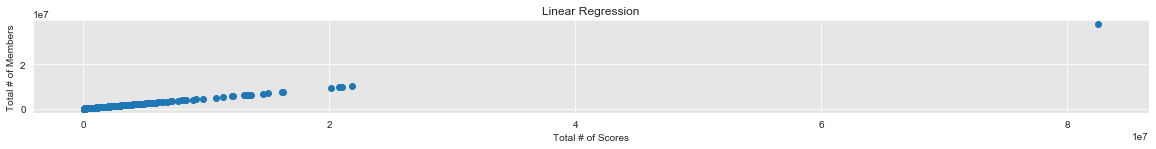

Predicted Cross Validation Model for Linear Regression


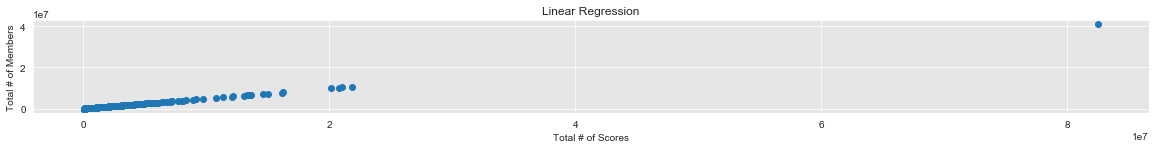

Predicted Model for Logistic Regression


NameError: name 'y1_pred_logreg' is not defined

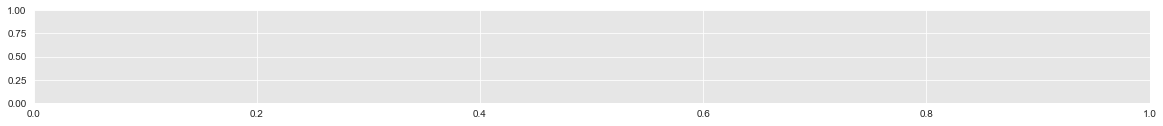

In [348]:
# ploting Linear Regression model
print('Original Dataset')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(811)
plt.scatter(X1,y1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Original Dataset')
plt.show()


# ploting Linear Regression model
print('Predicted Model for Linear Regression')
fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(812)
plt.scatter(X1_test,y1_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Linear Regression model
print('Predicted Cross Validation Model for Linear Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(813)
plt.scatter(X1_test, cv_pred_lr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Logistic Regression')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(814)
plt.scatter(X1_test,y1_pred_logreg)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Logistic Regression')
plt.show()


# ploting Ridge Regression model
print('Predicted Model for Ridge Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(815)
plt.scatter(X1_test,y1_pred_rr)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Ridge Regression')
plt.show()


# ploting Lasso Regression model
print('Predicted Model for Lasso Regression @ alpha = 0.01')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(816)
plt.scatter(X1_test,y1_pred_lasso01)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Lasso Regression')
plt.show()


# ploting Knn model Neighbor=1
print('Predicted Model for K-nearest Neighbors Regression @ 1')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(817)
plt.scatter(X1_test,y1_pred_knn)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Knn')
plt.show()


# ploting Random Forest Classifier =1 Model
print('Predicted Model for Random Forest Classifier @ N Estimators 100')

fig1 = plt.figure(figsize=(20,16))
ax1 = fig1.add_subplot(818)
plt.scatter(X1_test,y1_pred_rf_1)
plt.xlabel('Total # of Scores')
plt.ylabel('Total # of Members')
plt.title('Random Forest Classifier')
plt.show()


# Rank against Score

In [42]:
#Assigning X and y values aswell as the train and test of X and y
X2 = rank.values.reshape(-1,1)
y2 = score.values.reshape(-1)


X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size=0.2, random_state=3)


In [43]:
#Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X2_train,y2_train)

y2_pred_lr = lr.predict(X2_test)

lr_accuracy_train2 = lr.score(X2_train,y2_train)

lr_accuracy_test2 = lr.score(X2_test,y2_test)
 
    
print(f'Linear Regression train accuracy is: {lr_accuracy_train2}\nLinear Regression test accuracy is: {lr_accuracy_test2}')


# Cross Validation - Linear Regression
lr_cross_val_score2 = cross_val_score(lr, X2,y2, cv=10)
lr_cv_score_avg2 = lr_cross_val_score2.mean()
print(f'Avg Cross Val Linear Regression is: {lr_cv_score_avg2}')
cv_pred_lr2 = cross_val_predict(lr, X2_test, y2_test, cv=10)


Linear Regression train accuracy is: 0.7158371469432536
Linear Regression test accuracy is: 0.6960977586810557
Avg Cross Val Linear Regression is: 0.7255555957655252


In [44]:
X2_test.shape

(1112, 1)

In [45]:
# Ridge Regression
rr = Ridge(alpha=0.01)
rr.fit(X2_train,y2_train)
y2_pred_rr = rr.predict(X2_test)

rr_accuracy_train2 = rr.score(X2_train,y2_train)

rr_accuracy_test2 = rr.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr_accuracy_train2}\nRidge Regression test accuracy is: {rr_accuracy_test2}')

rr100 = Ridge(alpha=100)
rr100.fit(X2_train,y2_train)
y2_pred_rr100 = rr100.predict(X2_test)

rr100_accuracy_train2 = rr100.score(X2_train,y2_train)

rr100_accuracy_test2 = rr100.score(X2_test,y2_test)
 
print(f'Ridge Regression train accuracy is: {rr100_accuracy_train2}\nRidge Regression test accuracy is: {rr100_accuracy_test2}')



Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586810573
Ridge Regression train accuracy is: 0.7158371469432536
Ridge Regression test accuracy is: 0.6960977586959989


In [46]:
# Lasso Regression
lasso01 = Lasso(alpha=0.01)
lasso01.fit(X2_train,y2_train)
y2_pred_lasso01 = lasso01.predict(X2_test)

lasso01_accuracy_train_2 = lasso01.score(X2_train,y2_train)

lasso01_accuracy_test_2 = lasso01.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.01 train accuracy is: {lasso01_accuracy_train_2}\nLasso Regression @ alpha 0.01 test accuracy is: {lasso01_accuracy_test_2}')

lasso00001 = Lasso(alpha=0.00001)
lasso00001.fit(X2_train,y2_train)
y2_pred_lasso00001 = lasso00001.predict(X2_test)

lasso00001_accuracy_train_2 = lasso00001.score(X2_train,y2_train)

lasso00001_accuracy_test_2 = lasso00001.score(X2_test,y2_test)
 
print(f'Lasso Regression @ alpha 0.00001 train accuracy is: {lasso00001_accuracy_train_2}\nLasso Regression @ alpha 0.00001 test accuracy is: {lasso00001_accuracy_test_2}')


Lasso Regression @ alpha 0.01 train accuracy is: 0.7158371469364215
Lasso Regression @ alpha 0.01 test accuracy is: 0.6960977919435276
Lasso Regression @ alpha 0.00001 train accuracy is: 0.7158371469432537
Lasso Regression @ alpha 0.00001 test accuracy is: 0.696097758714325


Original Data


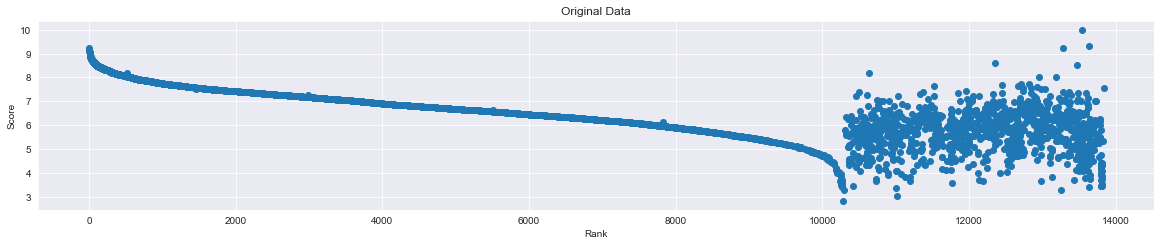

Predicted Model Linear Regression


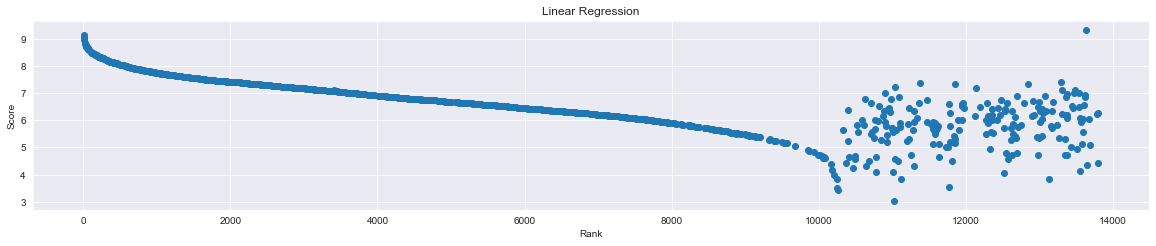

Predicted Cross Validation Model Linear Regression


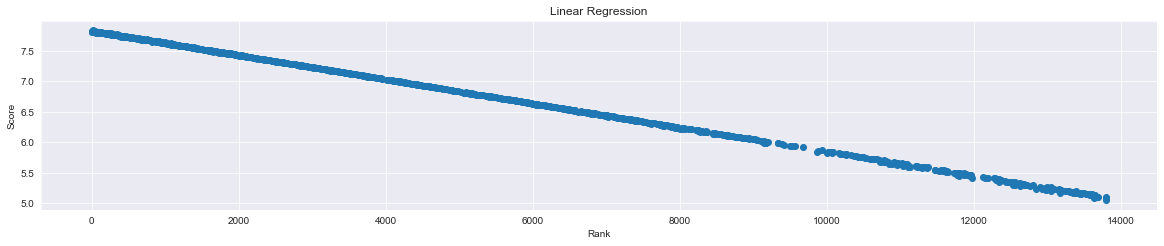

Predicted Model Ridge Regression


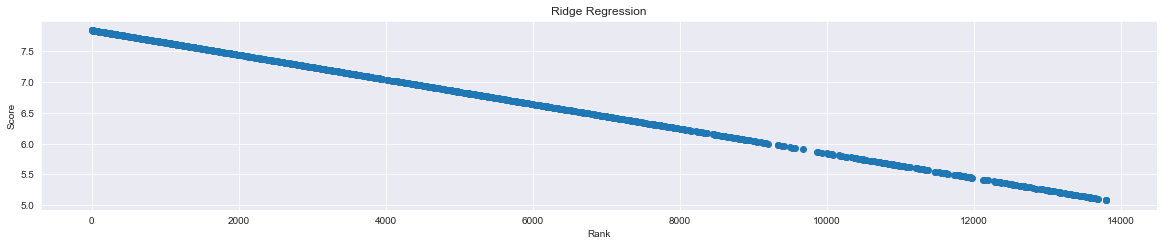

Predicted Model Lasso Regression


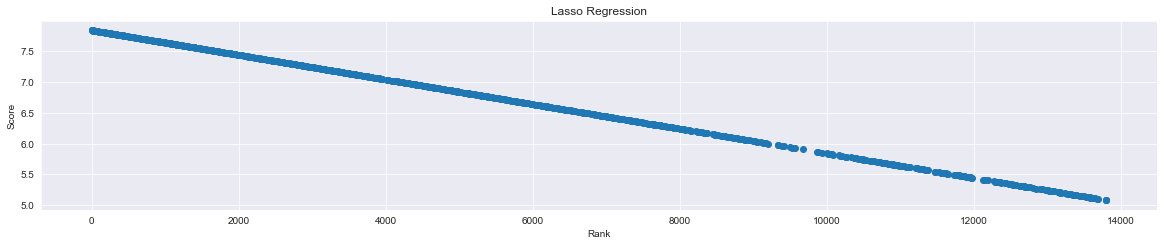

In [47]:
# ploting Linear Regression model

print('Original Data')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(413)
plt.scatter(X2,y2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Original Data')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_test)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()

# ploting Ridge Regression model

print('Predicted Cross Validation Model Linear Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,cv_pred_lr2)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Linear Regression')
plt.show()


# ploting Ridge Regression model

print('Predicted Model Ridge Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_rr)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Ridge Regression')
plt.show()

# ploting Lasoo Regression model

print('Predicted Model Lasso Regression')

fig2 = plt.figure(figsize=(20,16))
ax2 = fig2.add_subplot(414)
plt.scatter(X2_test,y2_pred_lasso01)
plt.xlabel('Rank')
plt.ylabel('Score')
plt.title('Lasso Regression')
plt.show()